----
# **Table of Contents**
----

**1.** [**Problem Statement**](#section1)<br>
**2.** [**Importing Packages**](#section2)<br>
  - **2.1** [**Installing and upgrading Libraries**](#section201)<br>
  - **2.2** [**Importing Libraries**](#section202)<br>

**3.** [**Loading Data**](#section3)<br>
**4.** [**Data Exploration**](#section4)<br>
  - **4.1** [**Description of the Dataset**](#section401)<br>
  - **4.2** [**Data Information**](#section402)<br>
  - **4.3** [**Pre-Profiling Report**](#section403)<br>

**5.** [**Data Preprocessing**](#section5)<br>
  - **5.1** [**Treating missing values**](#section501)<br>
  - **5.2** [**Treating duplicate values**](#section502)<br>
  - **5.3** [**Treating outliers**](#section503)<br>

**6.** [**Exploratory Data Analysis**](#section6)<br>
**7.** [**Data Post-processing**](#section7)<br>
**8.** [**Modelling**](#section8)<br>
**9.** [**Model Evaluation**](#section9)<br>
**10.** [**Conclusion**](#section9)<br>

----
<a id=section1></a>
# **1. Problem Statement**
----

Assignment: Predict the probabilities of default
-------------------------

1)Develop a data-driven credit risk model to predict the probabilities of default (PD)

2)Can you assign credit scores to existing or potential borrowers


Your submission will be evaluated on the following points:

● Data and modelling abilities along with the choice metrics

● Data Presentation skills



----
<a id=section2></a>
# **2.** **Installing and Importing Packages**
-----


<a id=section201></a>
### **2.1 Installing and upgrading Libraries**

- In this step we will **install and upgrade** the **necessary libraries and packages**.

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync. 

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [1]:
pip install pandas-profiling --upgrade

Note: you may need to restart the kernel to use updated packages.



<a id=section202></a>

### **2.2 Importing Libraries**

- In this step we will be importing the necessary **liabraries**

In [2]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import numpy.random as npr
import pandas as pd

# sets matplotlib to inline and displays graphs below the corressponding cell.
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline  
import matplotlib.cm as cm
style.use('fivethirtyeight')

import seaborn as sns
sns.set(style='whitegrid',color_codes=True)
from pandas_profiling import ProfileReport

#preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder

----
<a id=section3></a>
# **3. Loading Data**
----

- In this section we will be **loading the dataset(s).**

In [3]:
data = pd.read_csv('loan_data.csv')
print('Shape of the data is :', data.shape)
data.head()

Shape of the data is : (466285, 74)


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

   int_rate  installment grade sub_grade  ... total_bal_il il_util  \
0     10.65       162.87     B        B2  ...          NaN     NaN   
1     15.27        59.83     C        C4  ...          NaN     NaN   
2     15.96        84.33     C        C5  ...          NaN     NaN   
3     13.49       339.31     C        C1  ...          NaN     NaN   
4     12.69        67.79     B        B5  ...          NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_lim inq_fi  \
0         NaN          NaN        NaN      NaN              NaN    NaN   
1         NaN          NaN        NaN      NaN              NaN    NaN   
2         NaN          NaN        NaN      NaN              NaN    NaN   
3         NaN          NaN        NaN      NaN              NaN    NaN   
4         NaN          NaN        NaN      NaN              NaN    NaN   

  total_cu_tl inq_last_12m  
0         NaN          NaN  
1         NaN          NaN  
2         NaN          NaN  
3         NaN          NaN  
4         NaN          NaN  

[5 rows x 74 columns]

<a name = Section4></a>

---
# **4. Data Exploration**
---
- We can see that **loan_status** is the **target** variable.

- The dataset has **466285** rows and  **74** columns.


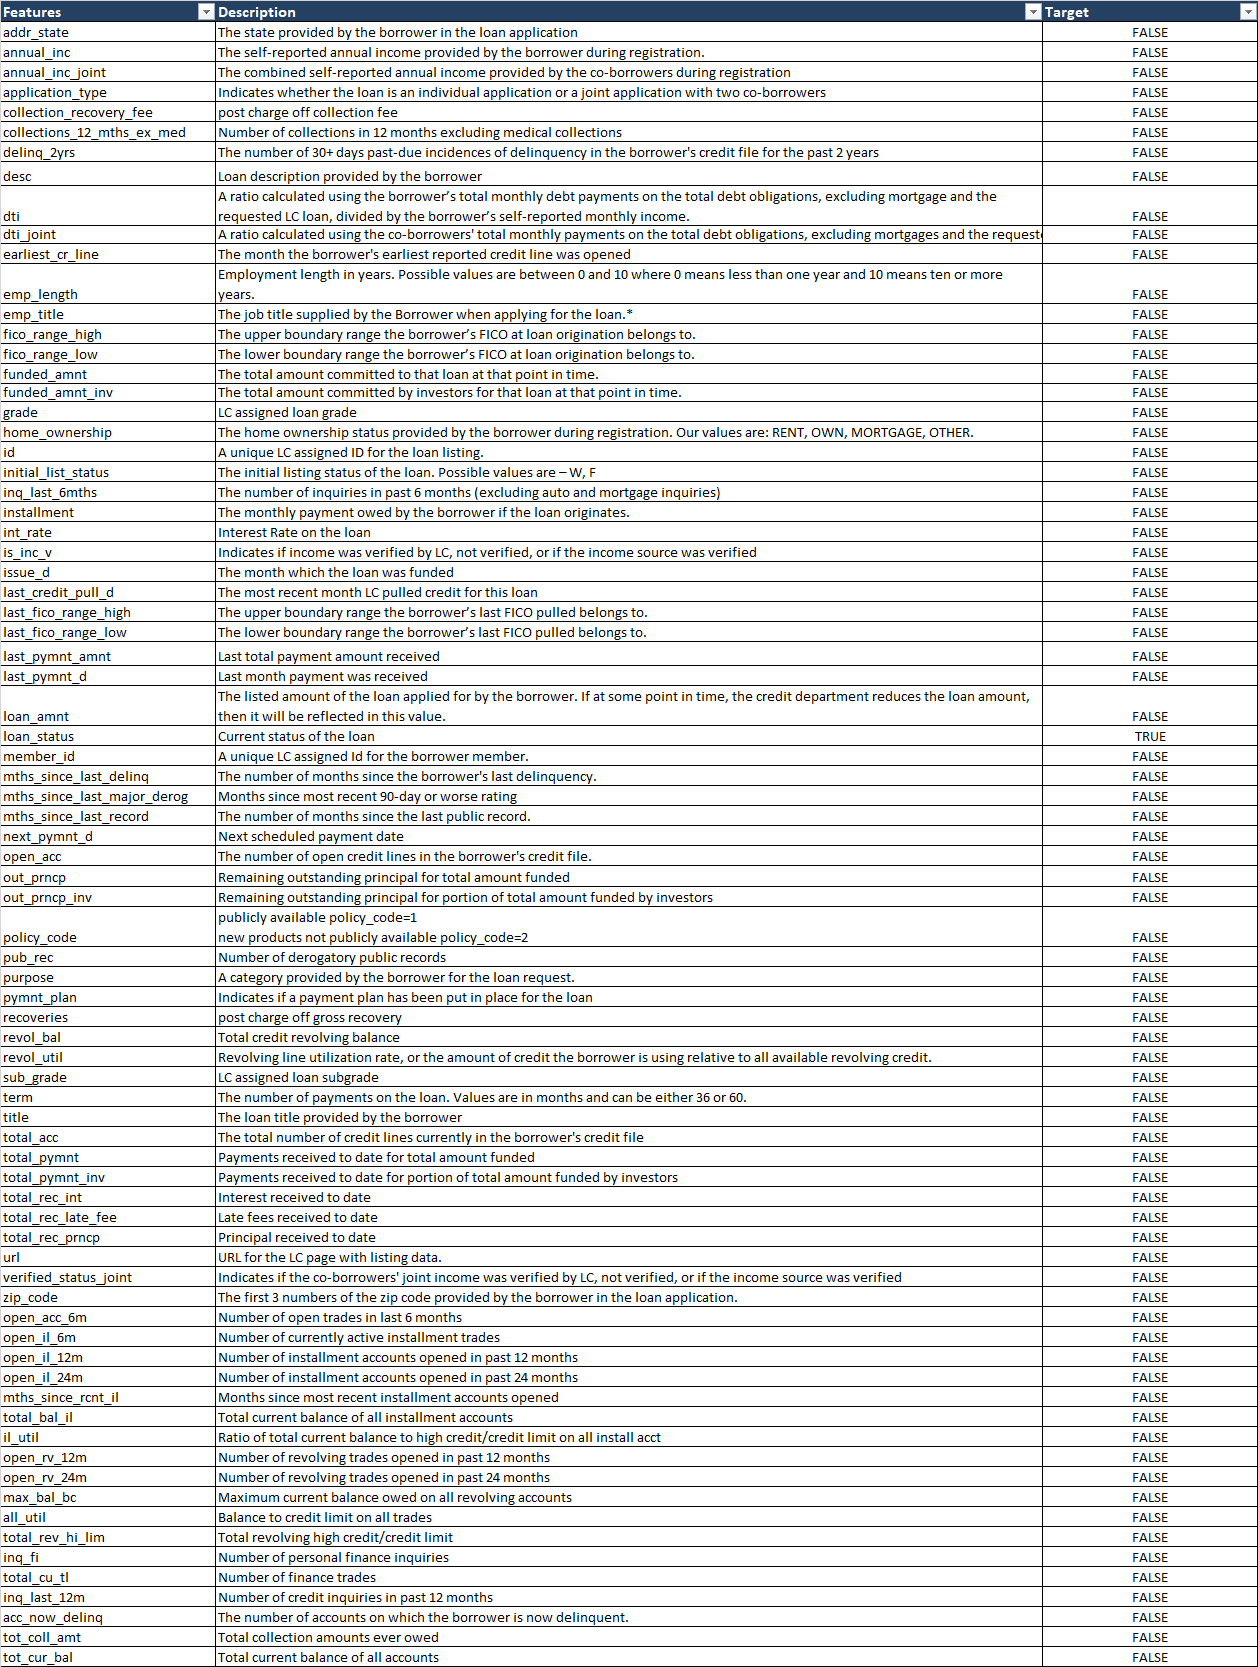

In [4]:
data.describe(include = 'all')

id     member_id      loan_amnt    funded_amnt  \
count   4.662850e+05  4.662850e+05  466285.000000  466285.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean    1.307973e+07  1.459766e+07   14317.277577   14291.801044   
std     1.089371e+07  1.168237e+07    8286.509164    8274.371300   
min     5.473400e+04  7.047300e+04     500.000000     500.000000   
25%     3.639987e+06  4.379705e+06    8000.000000    8000.000000   
50%     1.010790e+07  1.194108e+07   12000.000000   12000.000000   
75%     2.073121e+07  2.300154e+07   20000.000000   20000.000000   
max     3.809811e+07  4.086083e+07   35000.000000   35000.000000   

        funded_amnt_inv        term       int_rate    installment   grade  \
count     466285.000000      466285  466285.000000  466285.000000  466285   
unique              NaN           2            NaN            NaN       7   
top                 NaN   36 months            NaN            NaN       B   
freq                NaN      337953            NaN            NaN  136929   
mean       14222.329888         NaN      13.829236     432.061201     NaN   
std         8297.637788         NaN       4.357587     243.485550     NaN   
min            0.000000         NaN       5.420000      15.670000     NaN   
25%         8000.000000         NaN      10.990000     256.690000     NaN   
50%        12000.000000         NaN      13.660000     379.890000     NaN   
75%        19950.000000         NaN      16.490000     566.580000     NaN   
max        35000.000000         NaN      26.060000    1409.990000     NaN   

       sub_grade  ... total_bal_il il_util open_rv_12m  open_rv_24m  \
count     466285  ...          0.0     0.0         0.0          0.0   
unique        35  ...          NaN     NaN         NaN          NaN   
top           B3  ...          NaN     NaN         NaN          NaN   
freq       31686  ...          NaN     NaN         NaN          NaN   
mean         NaN  ...          NaN     NaN         NaN          NaN   
std          NaN  ...          NaN     NaN         NaN          NaN   
min          NaN  ...          NaN     NaN         NaN          NaN   
25%          NaN  ...          NaN     NaN         NaN          NaN   
50%          NaN  ...          NaN     NaN         NaN          NaN   
75%          NaN  ...          NaN     NaN         NaN          NaN   
max          NaN  ...          NaN     NaN         NaN          NaN   

       max_bal_bc all_util total_rev_hi_lim inq_fi total_cu_tl inq_last_12m  
count         0.0      0.0     3.960090e+05    0.0         0.0          0.0  
unique        NaN      NaN              NaN    NaN         NaN          NaN  
top           NaN      NaN              NaN    NaN         NaN          NaN  
freq          NaN      NaN              NaN    NaN         NaN          NaN  
mean          NaN      NaN     3.037909e+04    NaN         NaN          NaN  
std           NaN      NaN     3.724713e+04    NaN         NaN          NaN  
min           NaN      NaN     0.000000e+00    NaN         NaN          NaN  
25%           NaN      NaN     1.350000e+04    NaN         NaN          NaN  
50%           NaN      NaN     2.280000e+04    NaN         NaN          NaN  
75%           NaN      NaN     3.790000e+04    NaN         NaN          NaN  
max           NaN      NaN     9.999999e+06    NaN         NaN          NaN  

[11 rows x 74 columns]

<a id=section402></a>

### **4.2 Data Information**

- In this section we will check the **information** of the data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

**Observations:**

- We can see that there are **22 object type** and **52 numerical** variables.

- As we can see many data have missing values , we will have to perform some data preprocessing. 

<a id=section403></a>
### **4.3 Pre Profiling Report**

- For **quick analysis** pandas profiling is very handy.

- Generates profile reports from a pandas DataFrame.

- For each column **statistics** are presented in an interactive **HTML report**.

In [6]:
# Performing pandas profiling before data preprocessing.
from pandas_profiling import ProfileReport
profile = ProfileReport(data,
                        title='Pandas Profiling before Data Preprocessing',
                        minimal=True,
                        progress_bar=True)
print('Acomplished!')
profile.to_notebook_iframe()

Acomplished!


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Observations:**

- We can see that there are **9 classes** in the **target variable (loan_status)**

<a id=section5></a>

---

# **5.** **Data Preprocessing**

---

- In this section we will perform **Data Preprocessing**.
- Initially in **Data Cleaning** we will check for **Inconsistant data**, **Missing values** and **Duplicated Data**.
- Next we will check for **Outliers** in the data.

<a name = Section501></a>
### **5.1 Data Cleaning**

- In this section, we will clean out our data based on the information retrieved from the previous observations.

In [7]:
data.dtypes

id                    int64
member_id             int64
loan_amnt             int64
funded_amnt           int64
funded_amnt_inv     float64
                     ...   
all_util            float64
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
Length: 74, dtype: object

In [8]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [9]:
# Making of a helper function for separating numerical and categorical data
def separate_categorical_and_numerical(data):
    categorical_columns,numerical_columns = [] , []
    for i in data.columns:
        if data[i].dtypes == 'object':
            categorical_columns.append(i)
        else:
            numerical_columns.append(i)
    
    return categorical_columns, numerical_columns

In [10]:
categorical_columns, numerical_columns = separate_categorical_and_numerical(data)

In [11]:
categorical_columns

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'initial_list_status',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [12]:
numerical_columns

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

In [13]:
data.isnull().sum()

id                       0
member_id                0
loan_amnt                0
funded_amnt              0
funded_amnt_inv          0
                     ...  
all_util            466285
total_rev_hi_lim     70276
inq_fi              466285
total_cu_tl         466285
inq_last_12m        466285
Length: 74, dtype: int64

In [14]:
# Making of a helper function for cleaning the data
def data_cleaning(categorical_columns,numerical_columns,data):
    from tqdm.notebook import tqdm
    # Replacing the null values with the mode for categorcial variables
    for i in tqdm(categorical_columns):
        data[i].replace(np.nan, data[i].mode()[0], inplace = True)
        print('Categorical Data Cleaned')

    #Replacing the null values with the mean for contnious variables
    for j in tqdm(numerical_columns):
        data[j].replace(np.nan, np.mean(data[j]), inplace = True)
        print('Continious Data Cleaned')
        
    # Return Statement
    data_cleaned = data
    return data_cleaned

In [15]:
data_cleaned = data_cleaning(categorical_columns,numerical_columns,data)

  0%|          | 0/22 [00:00<?, ?it/s]

Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned
Categorical Data Cleaned


  0%|          | 0/52 [00:00<?, ?it/s]

Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data Cleaned
Continious Data 

In [16]:
data_cleaned.isnull().sum().index

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [17]:
unwanted_columns = []
for (i,j) in zip(data_cleaned.isnull().sum().index,data_cleaned.isnull().sum().values):
    if j >= 466280:
        print(i)
        unwanted_columns.append(i)

annual_inc_joint
dti_joint
verification_status_joint
open_acc_6m
open_il_6m
open_il_12m
open_il_24m
mths_since_rcnt_il
total_bal_il
il_util
open_rv_12m
open_rv_24m
max_bal_bc
all_util
inq_fi
total_cu_tl
inq_last_12m


**Observations:**

- We can see that for most of these features the **number of missing values is > 466280.**

- Apart from that as **number of missing entries for these data types is > 90 % of the total size of the data** and even the **datatypes** are **incorrect** hence, we will have to drop these fields.

- For applying this process, we may encounter some **data loss.**

In [18]:
for i in unwanted_columns:
    data_cleaned = data_cleaned.drop(i, axis =1)

In [19]:
data_cleaned.shape, data.shape

((466285, 57), (466285, 74))

In [20]:
data_cleaned.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
url                            0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc  

**Observations:**

- We can see that we have successfully removed all of the unwanted features.

- However, there is a significant loss in the data that needs to be addressed.

<a name = Section54></a>
### **5.4 Post Profiling Report (Train Data)**

- In this section, we will observe the changes after performing data pre-processing, if present in the dataset.

In [21]:
profile = ProfileReport(data_cleaned,
                        title='Pandas Profiling after Data Preprocessing',
                        minimal=True,
                        progress_bar=True)
print('Acomplished!')
profile.to_notebook_iframe()

Acomplished!


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

In [22]:
# The following function plots 2 respective subplots for continious features
def plot_continious_data(data_cleaned):
    # Importing the dependencies
    from tqdm.notebook import tqdm
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    %matplotlib inline
    
    # Separating numerical and categrical columns
    categorical_cols,numerical_cols = separate_categorical_and_numerical(data_cleaned)
    
    for i in tqdm(numerical_cols):
        plt.figure(figsize = [15,3])
        sns.set(style="darkgrid")
        plt.subplot(1, 2, 1)
        sns.boxplot(data=data_cleaned,x=i,color='orange')
        plt.subplot(1, 2, 2)
        sns.distplot(a=data_cleaned[i],color='darkblue')
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

  0%|          | 0/35 [00:00<?, ?it/s]

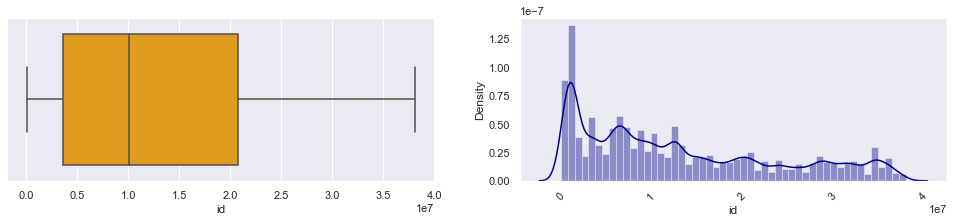

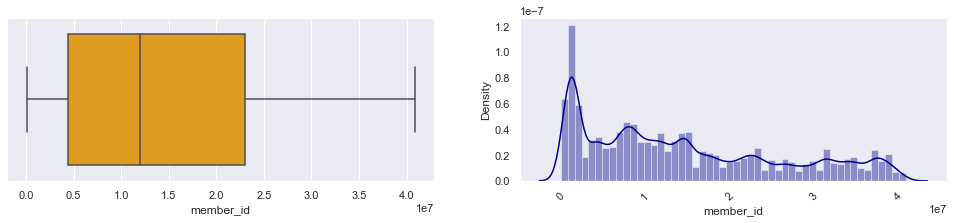

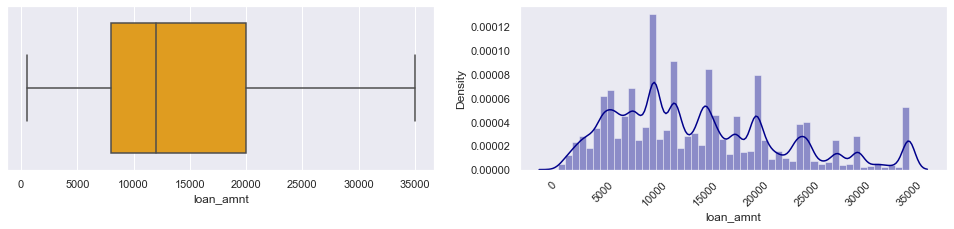

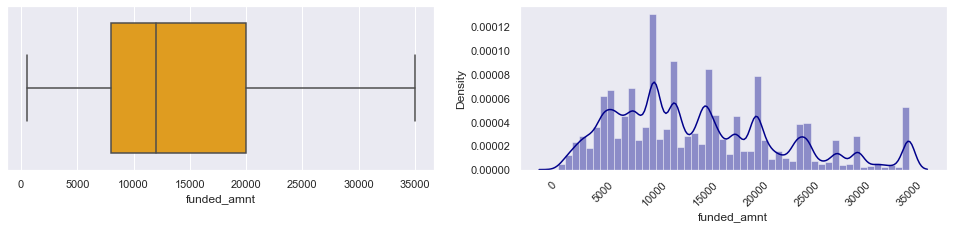

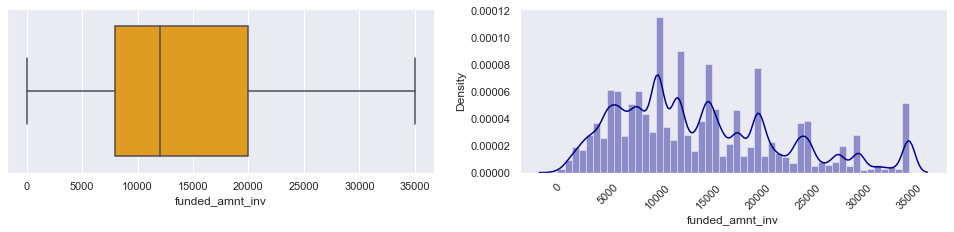

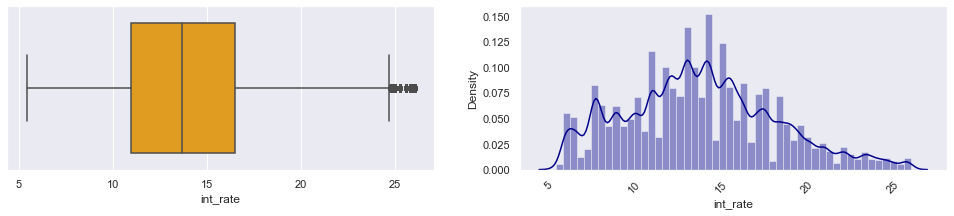

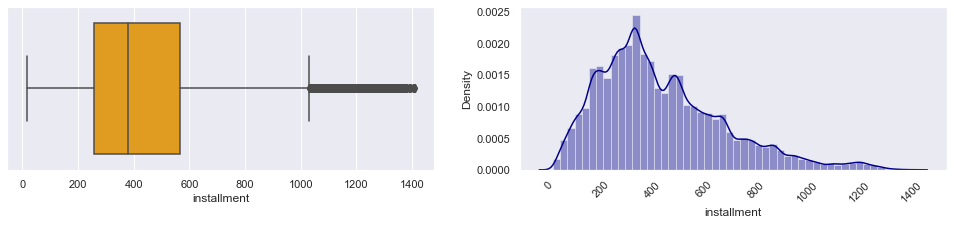

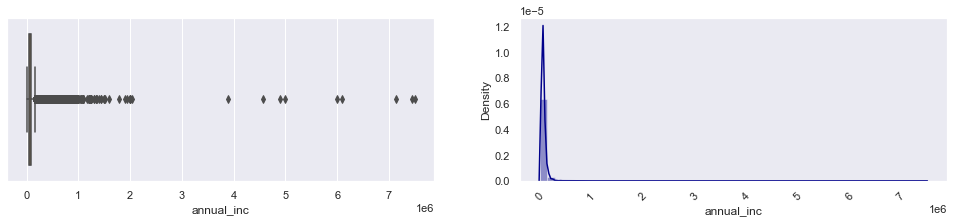

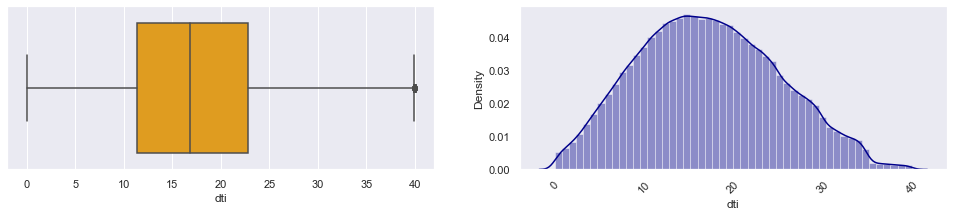

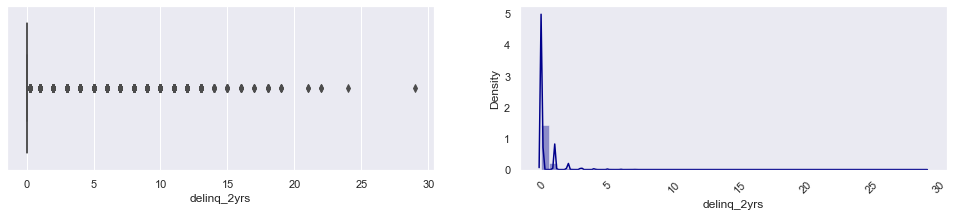

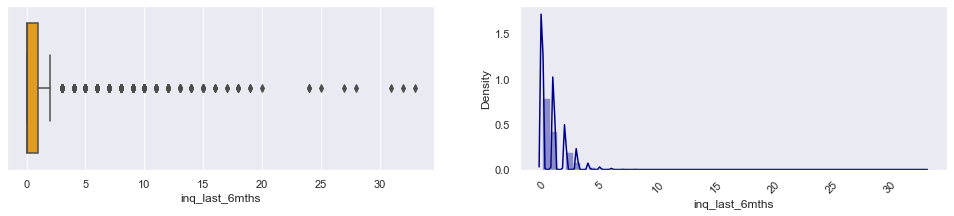

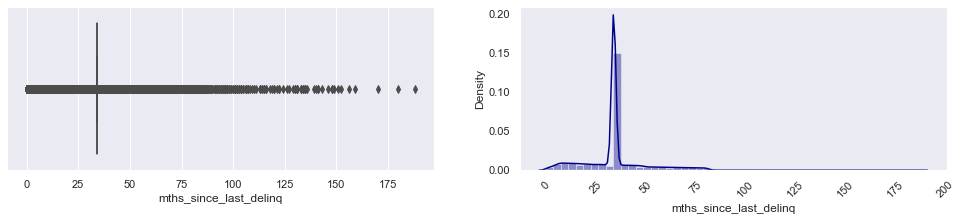

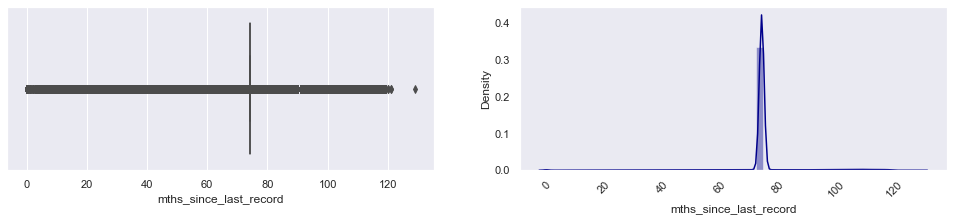

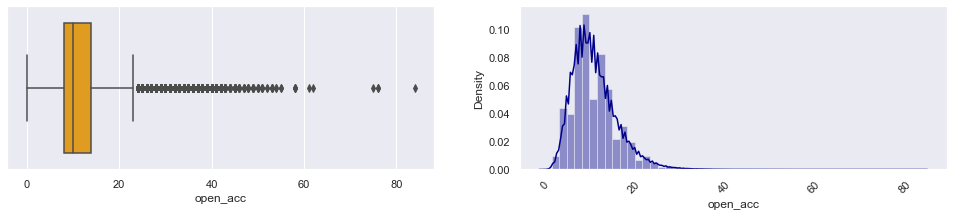

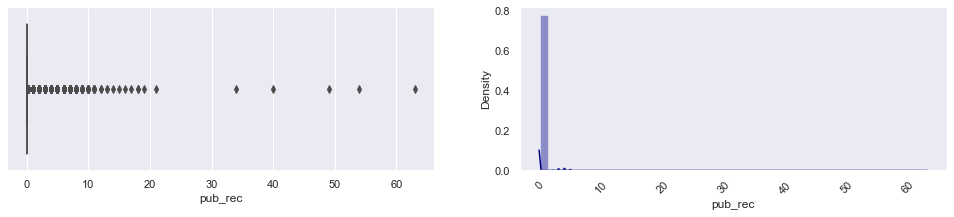

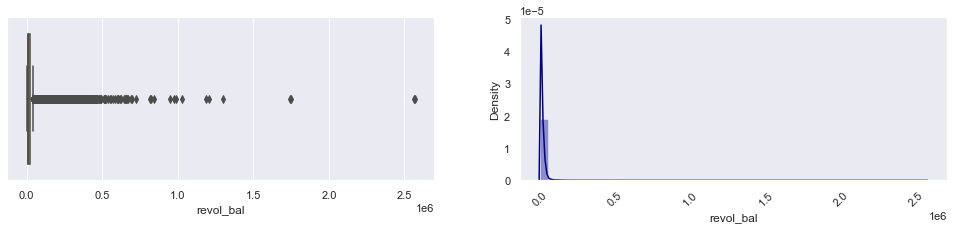

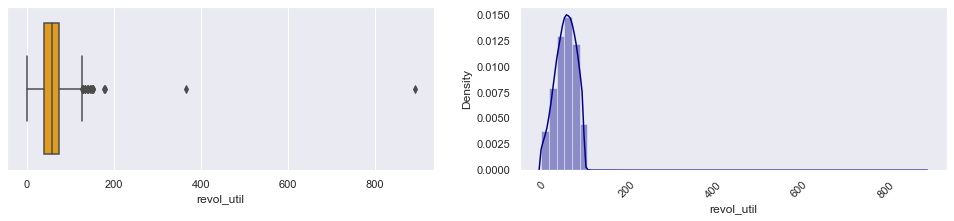

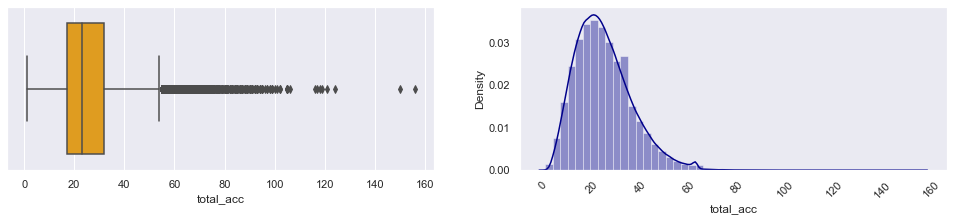

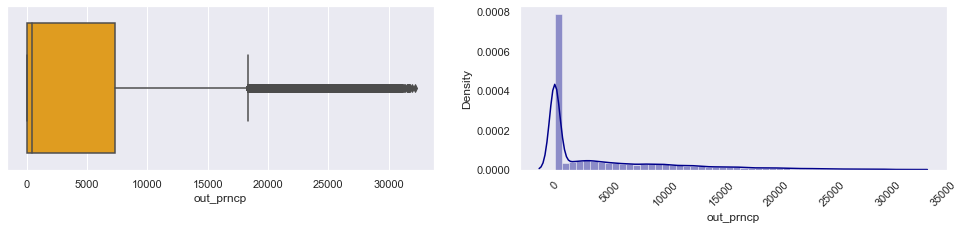

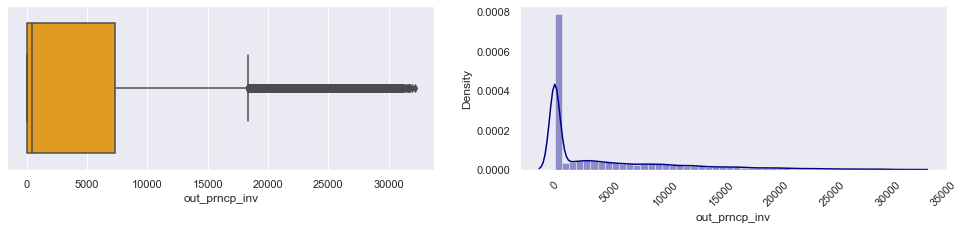

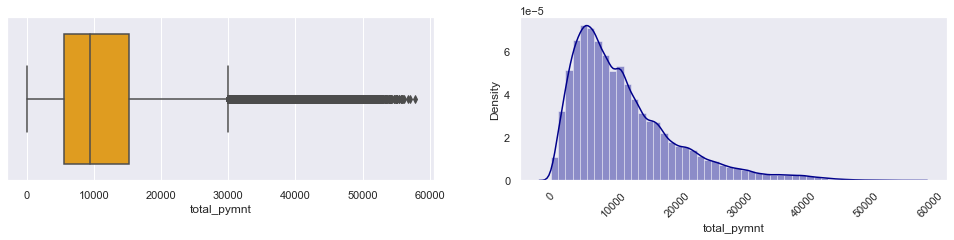

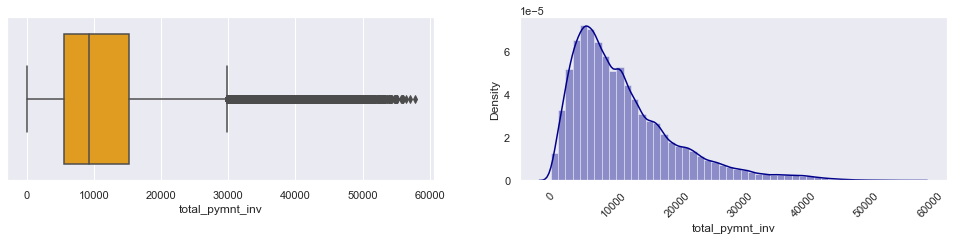

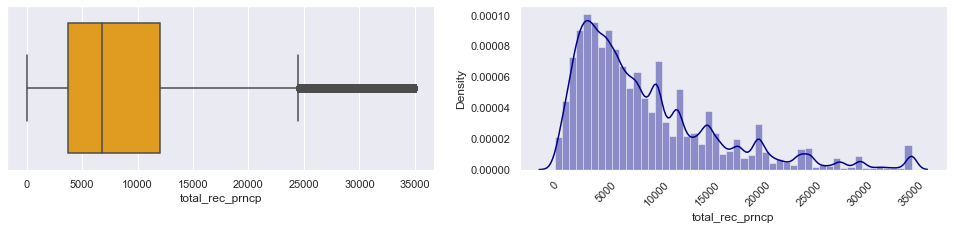

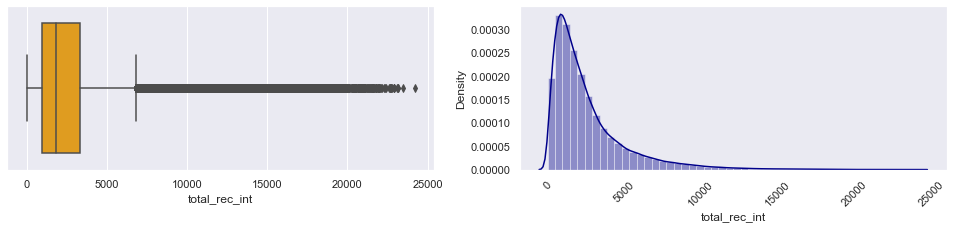

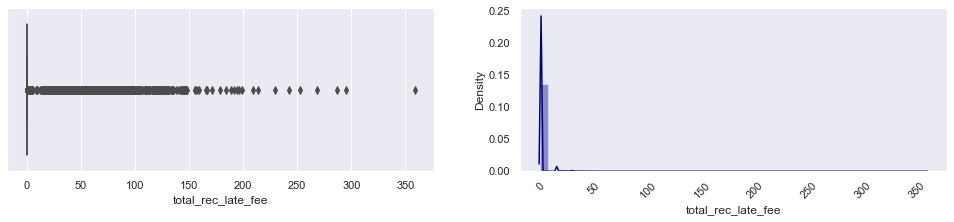

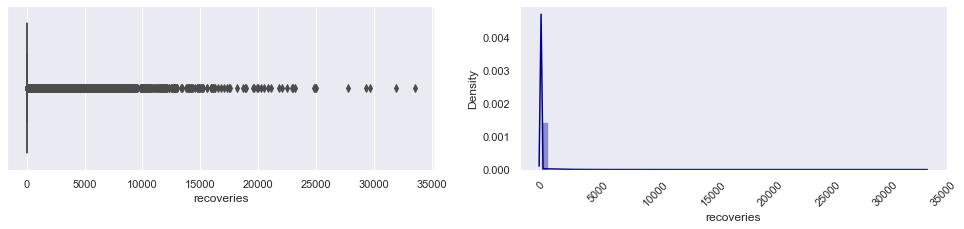

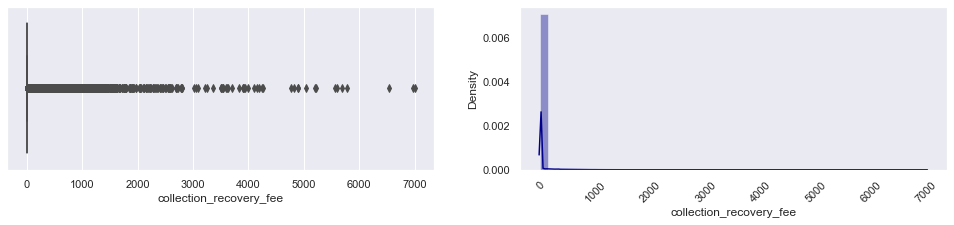

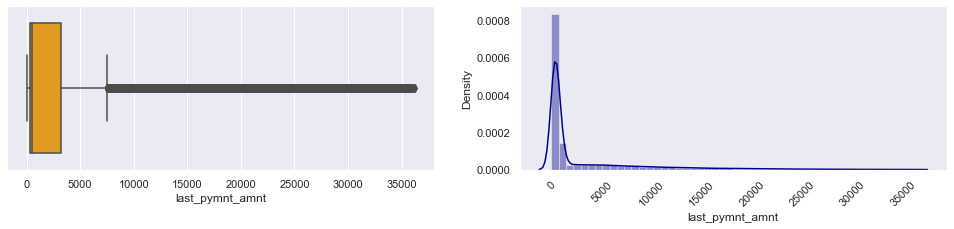

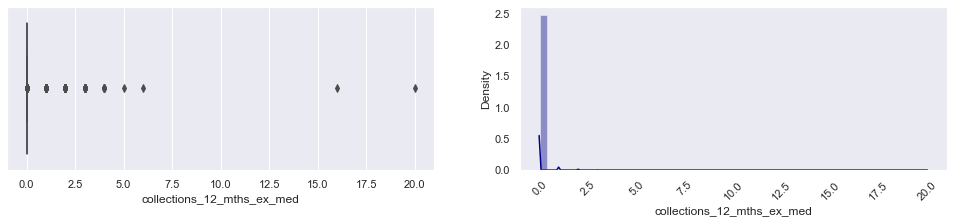

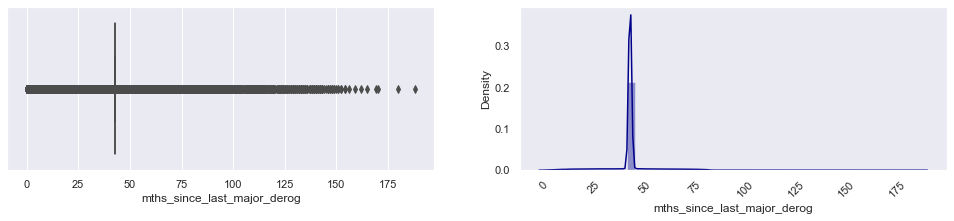

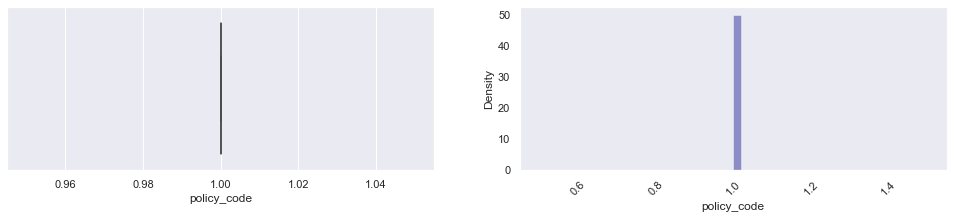

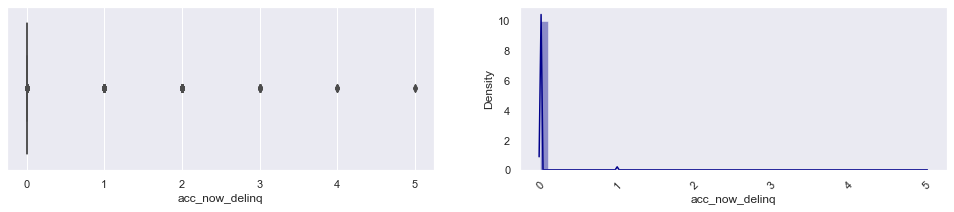

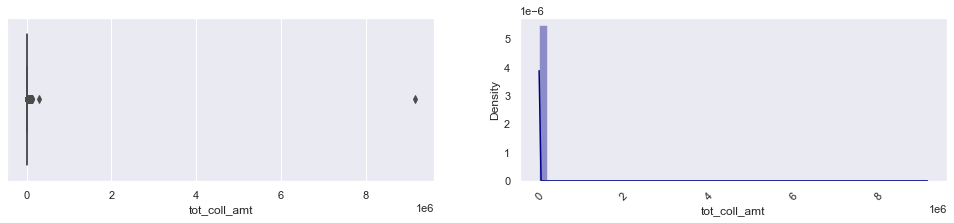

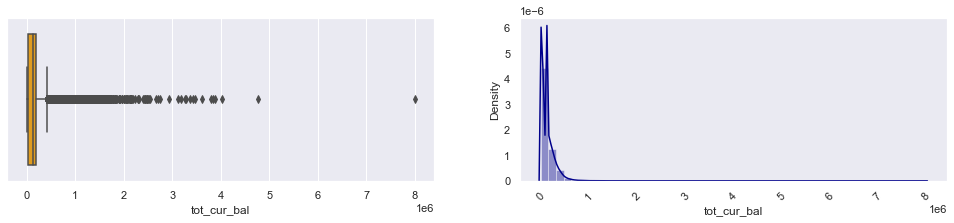

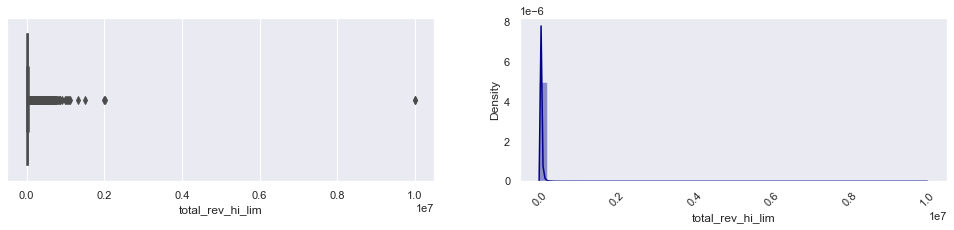

In [23]:
plot_continious_data(data_cleaned)

In [24]:
def plot_categorical_data(data_cleaned):
    # Importing the dependencies
    from tqdm.notebook import tqdm
    import seaborn as sns
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Separating numerical and categrical columns
    categorical_cols,numerical_cols = separate_categorical_and_numerical(data_cleaned)
    
    for i in tqdm(categorical_cols):
        values = data_cleaned[i].value_counts().head(10).values
        labels = data_cleaned[i].value_counts().head(10).index
        plt.figure(figsize = [20,10])
        sns.set(style="darkgrid")
        plt.subplot(1, 2, 1)
        plt.barh(width=values,y=labels,color='orange')
        plt.xlabel('Count')
        plt.ylabel(i)
        plt.title('Top 10 values of {}'.format(i))
        plt.subplot(1, 2, 2)
        plt.pie(values,labels=labels,autopct='%1.0f%%')
        plt.title('Percentage Distribution for the Top 10 values of {}'.format(i))
        plt.xticks(rotation=45)
        plt.grid()
        plt.show()

  0%|          | 0/22 [00:00<?, ?it/s]

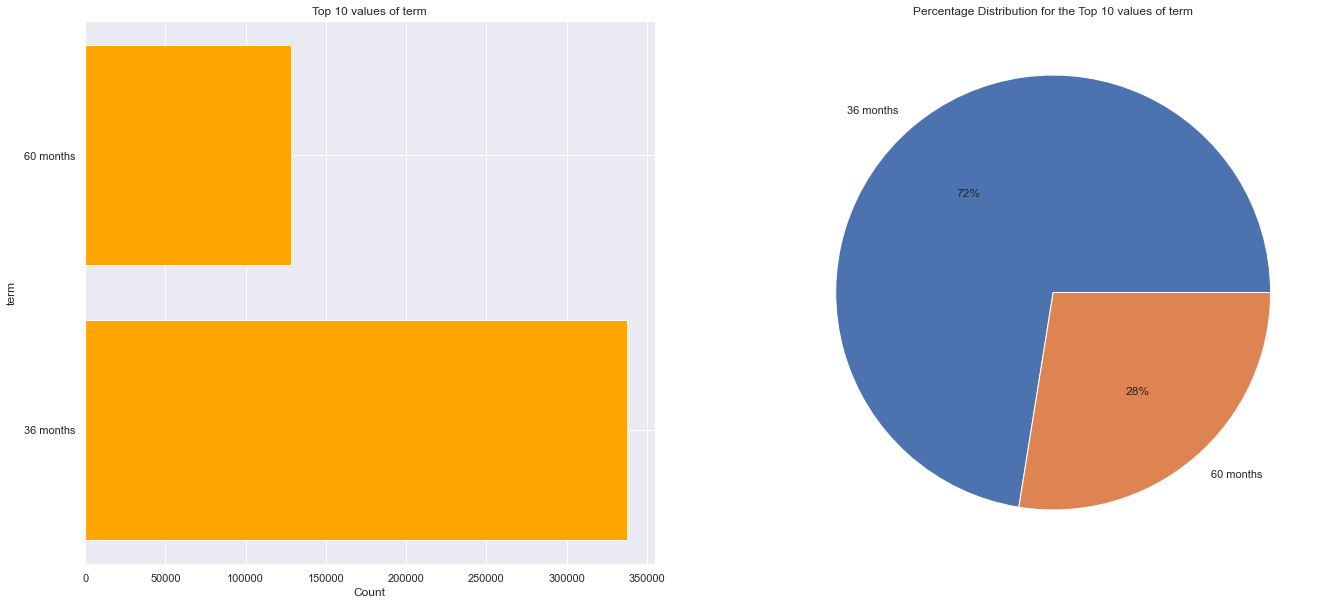

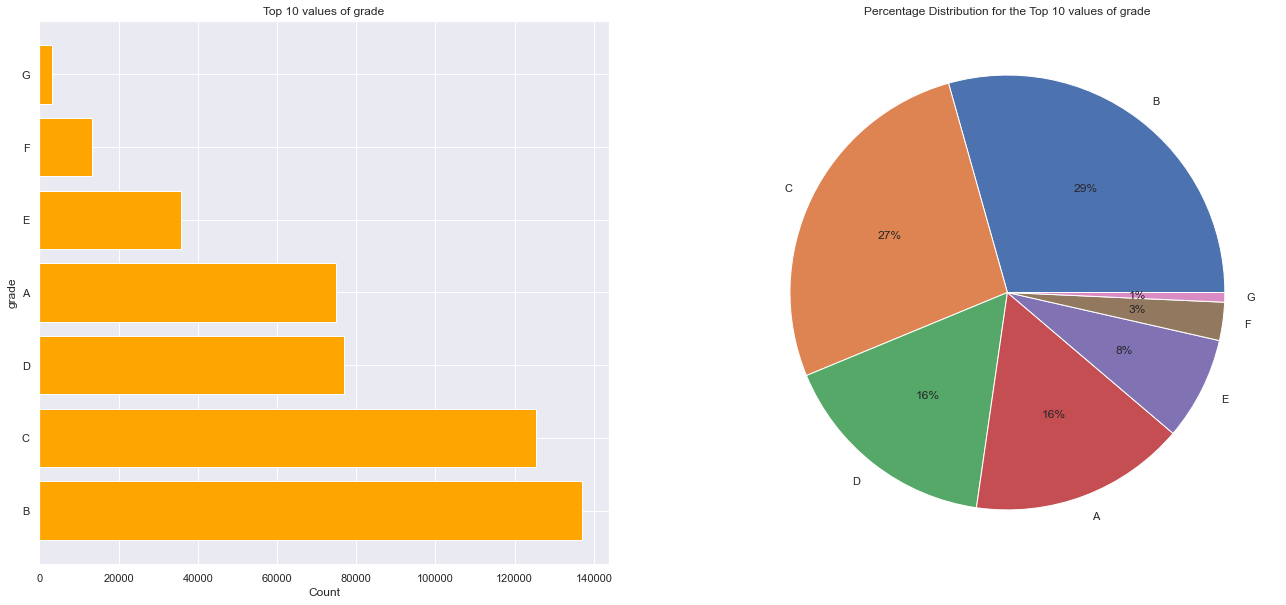

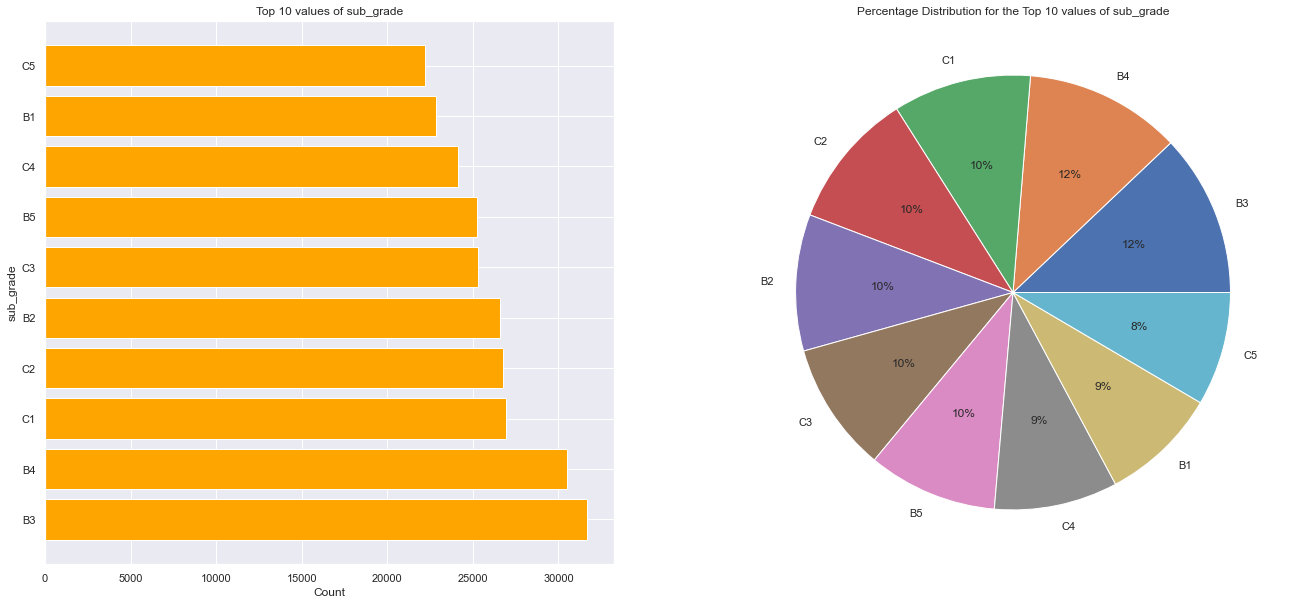

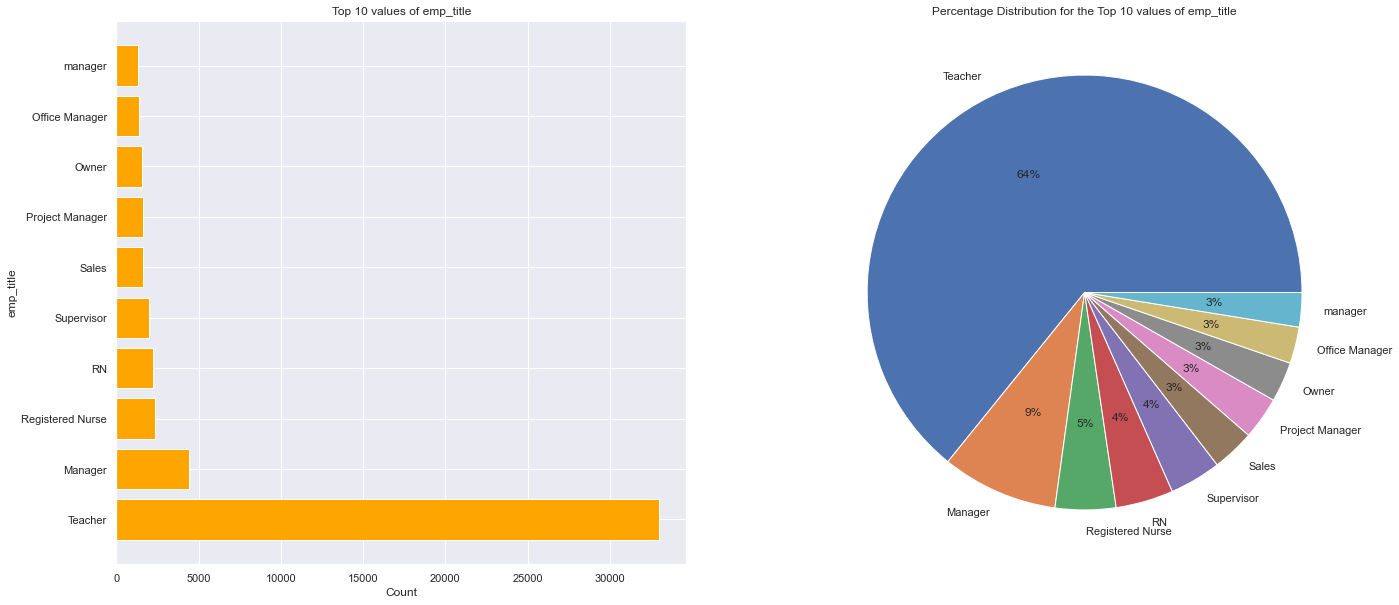

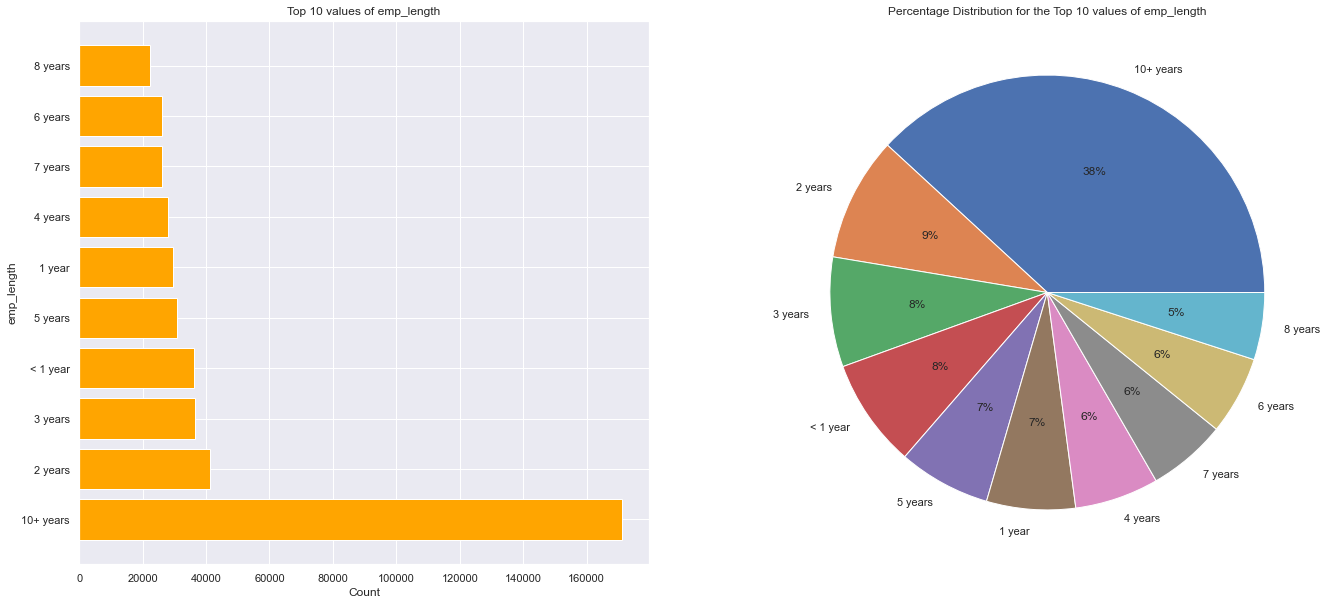

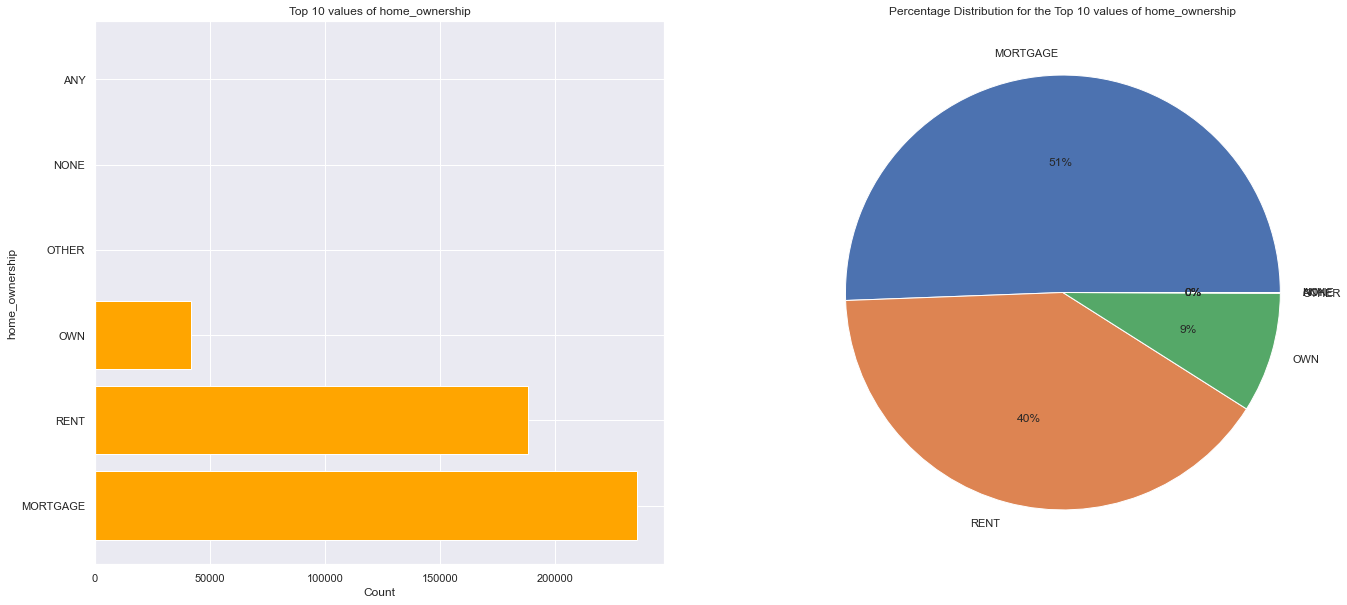

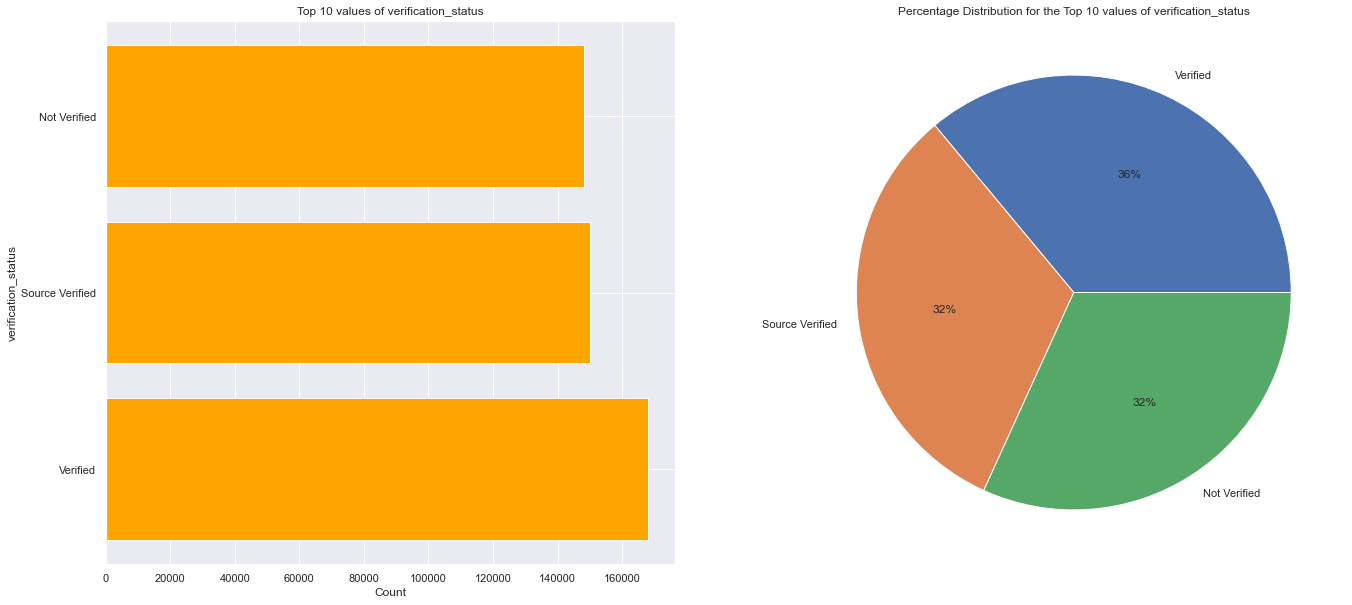

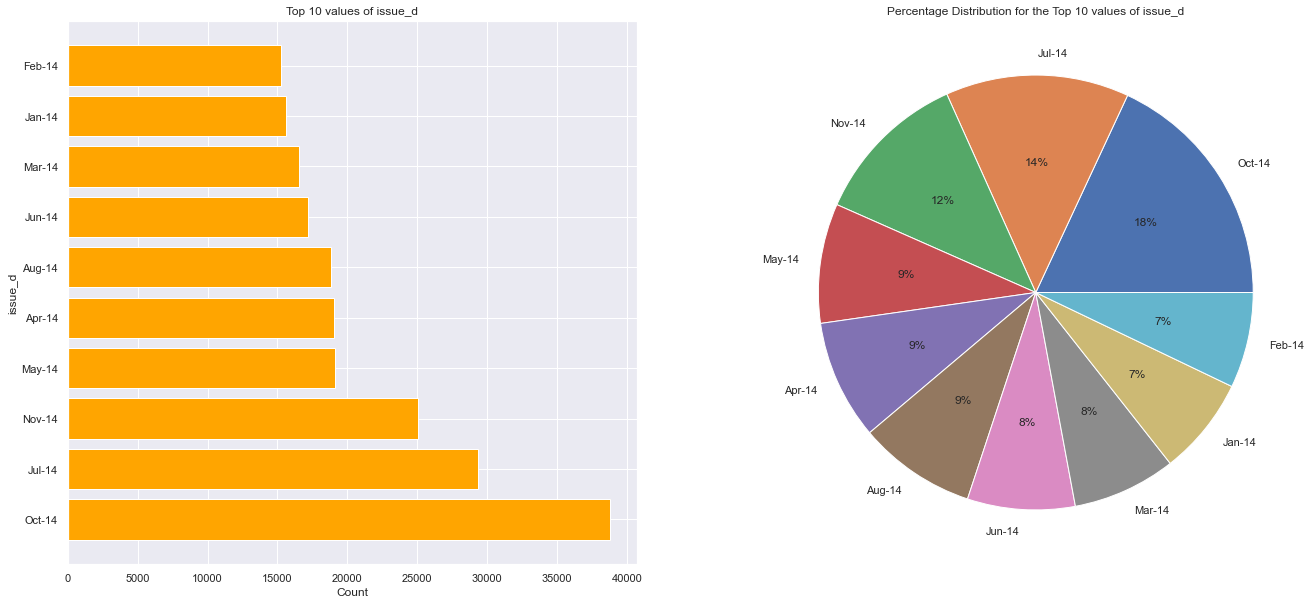

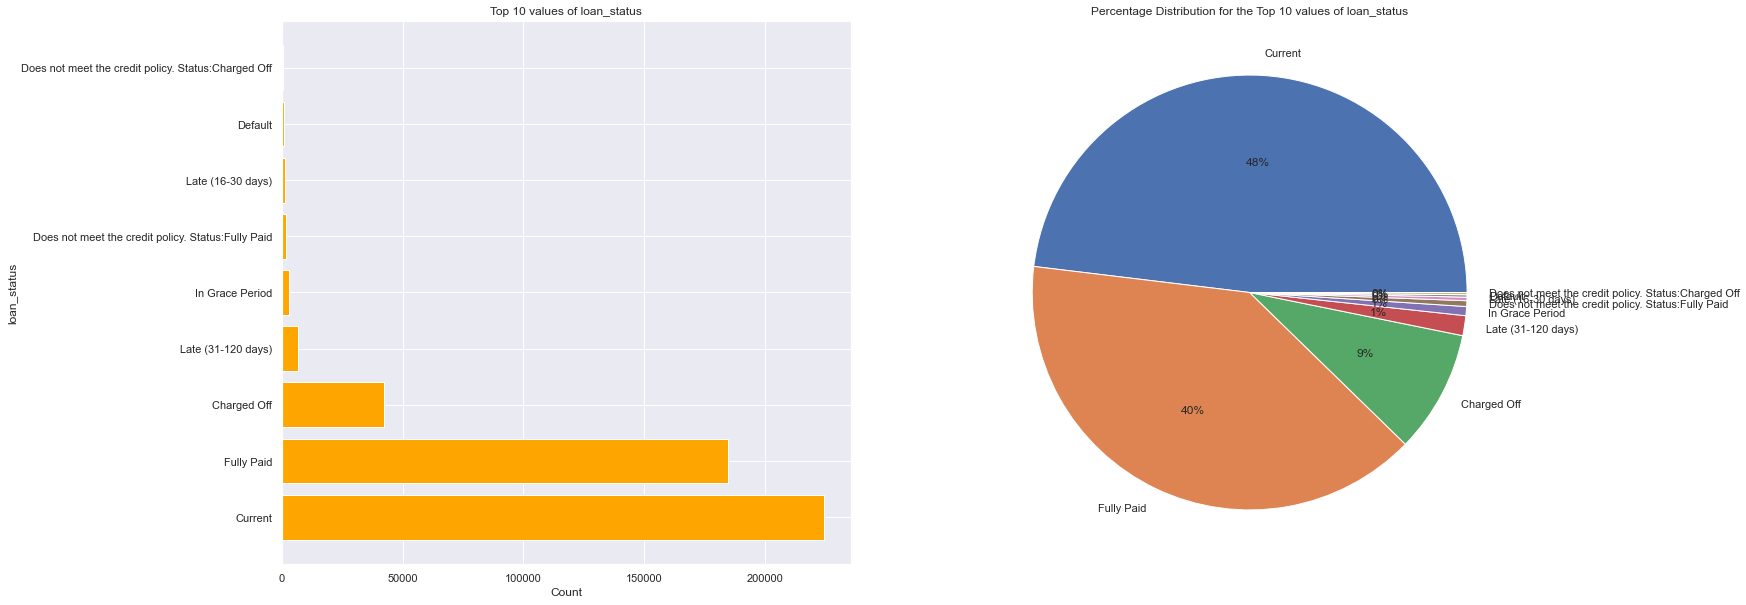

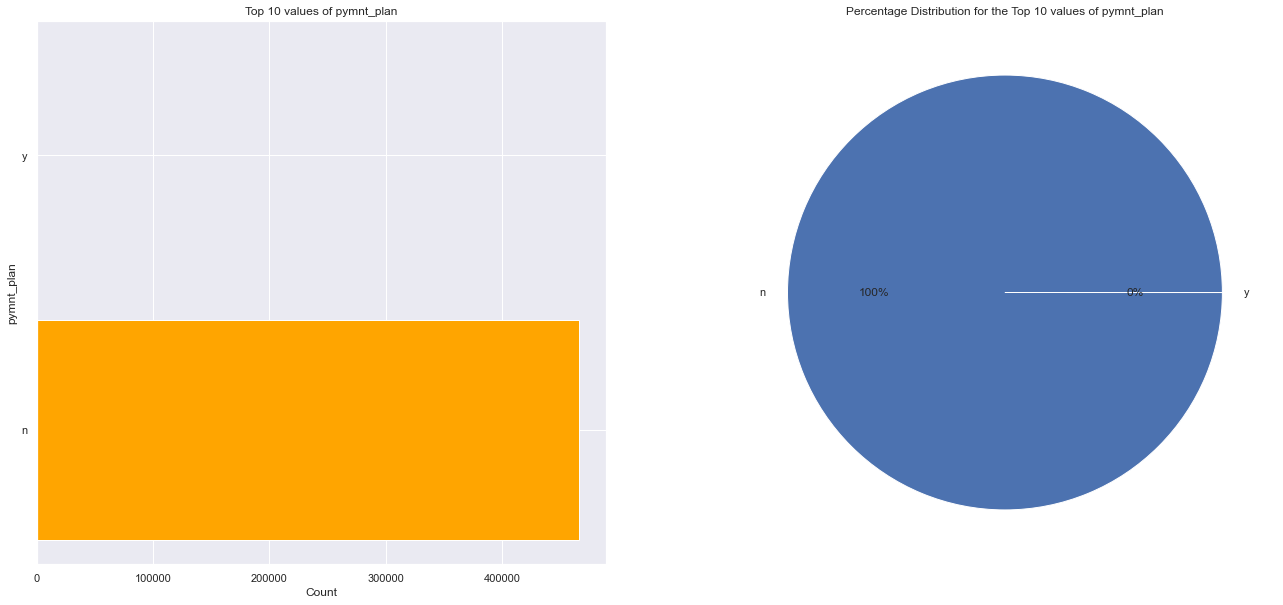

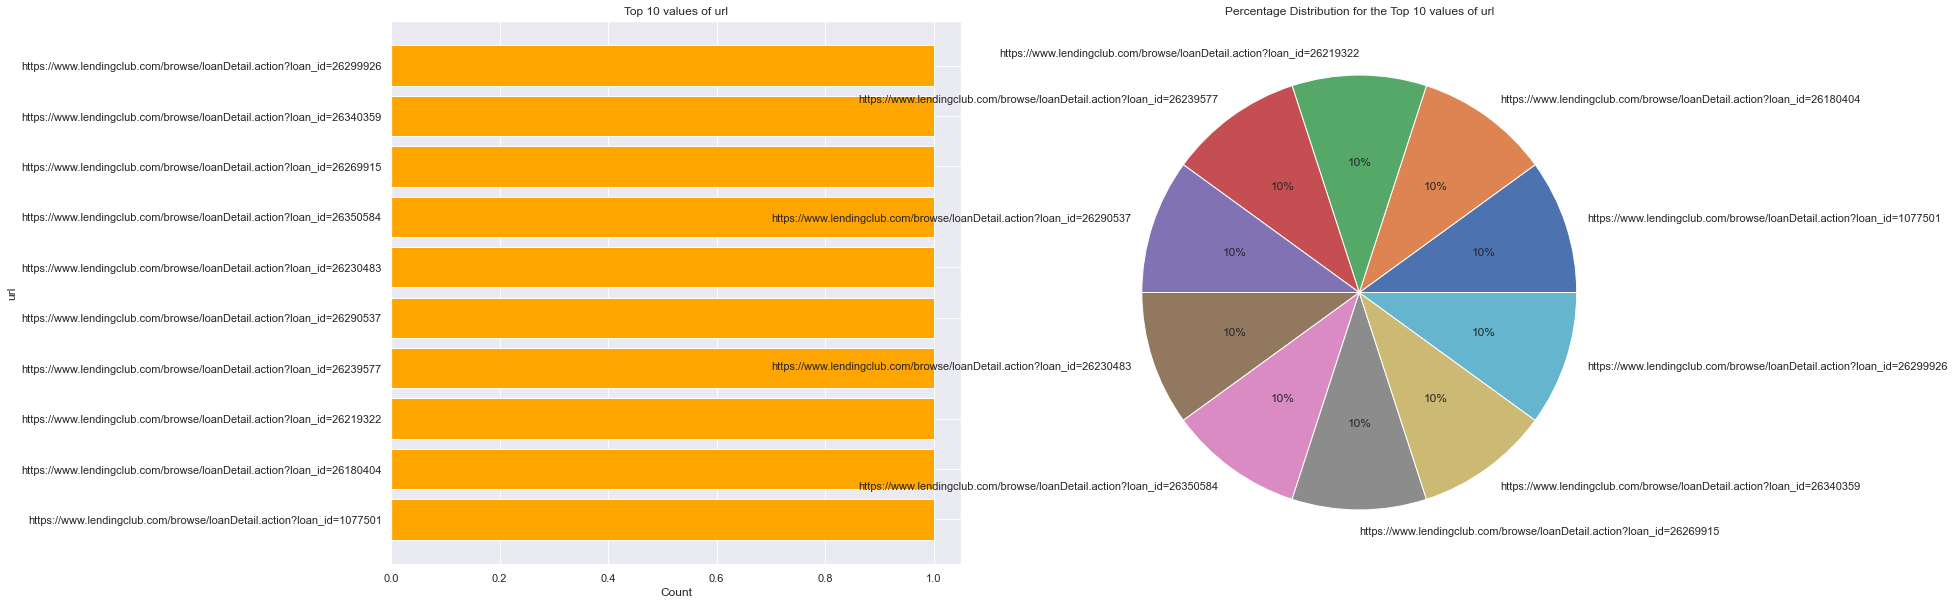

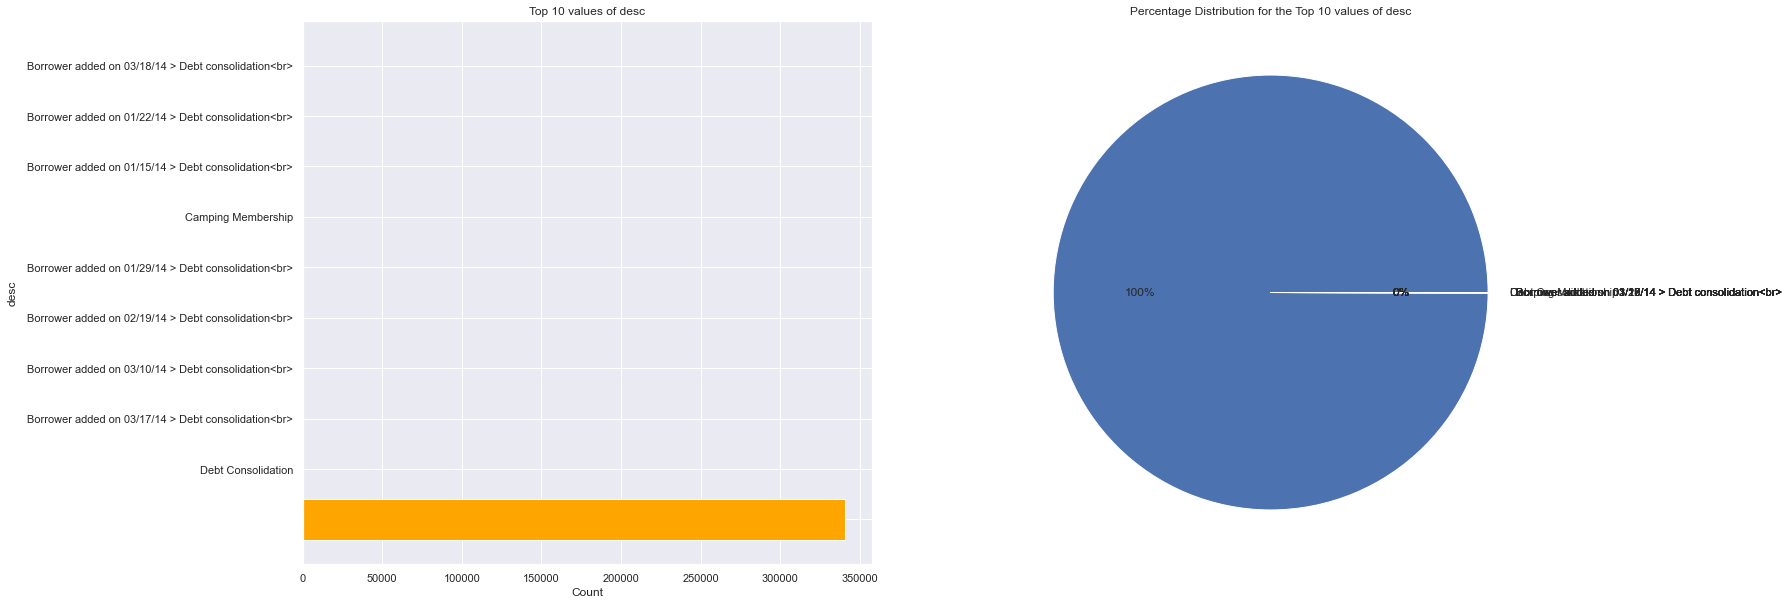

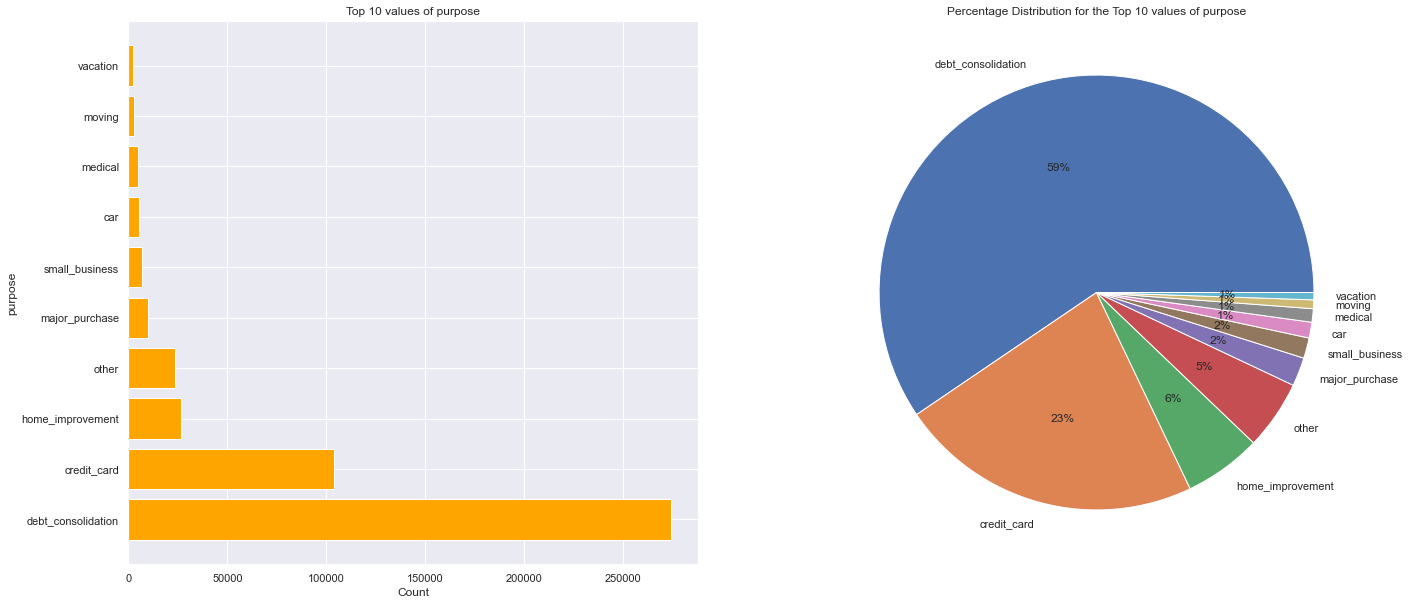

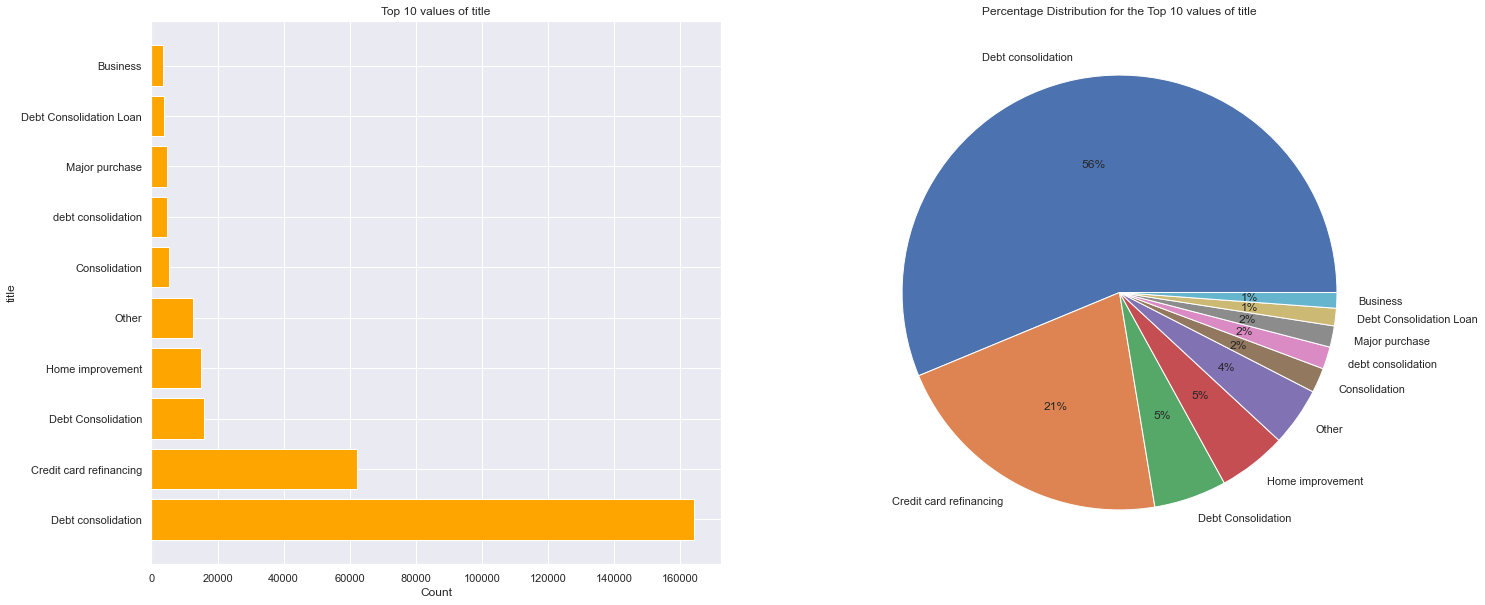

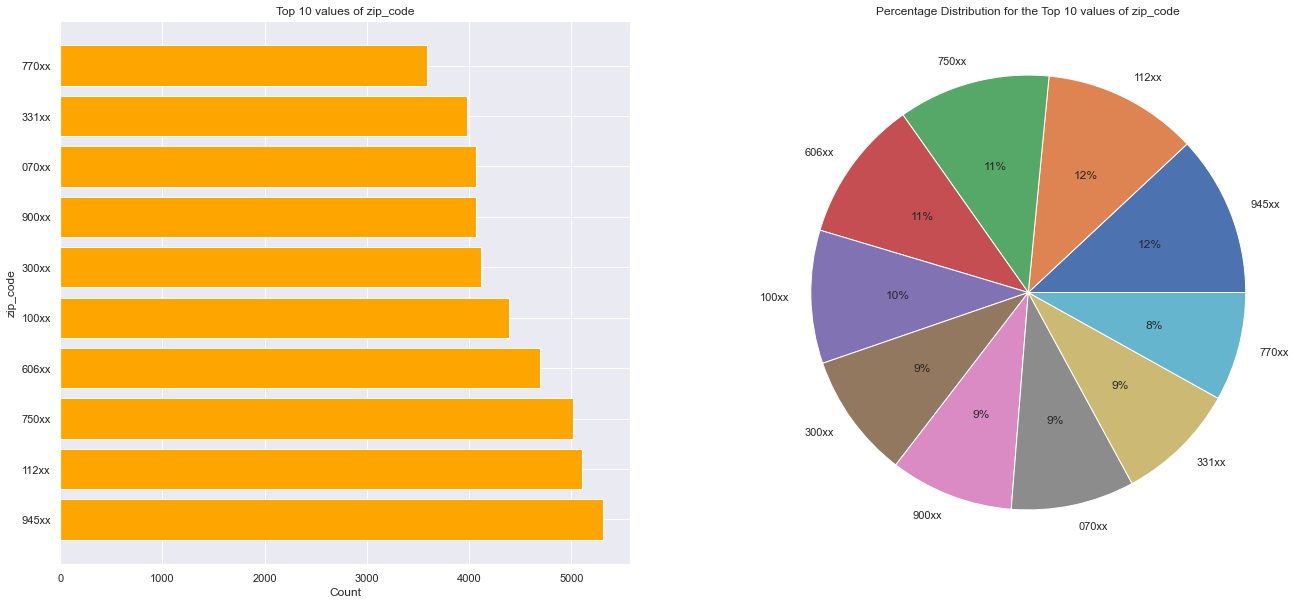

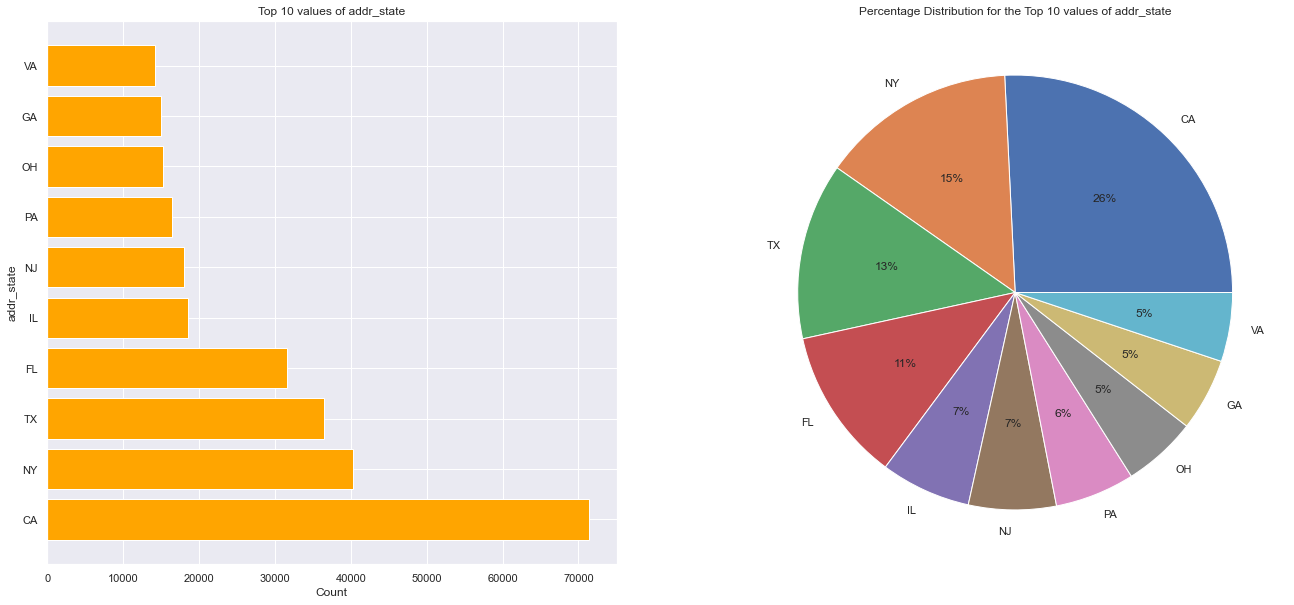

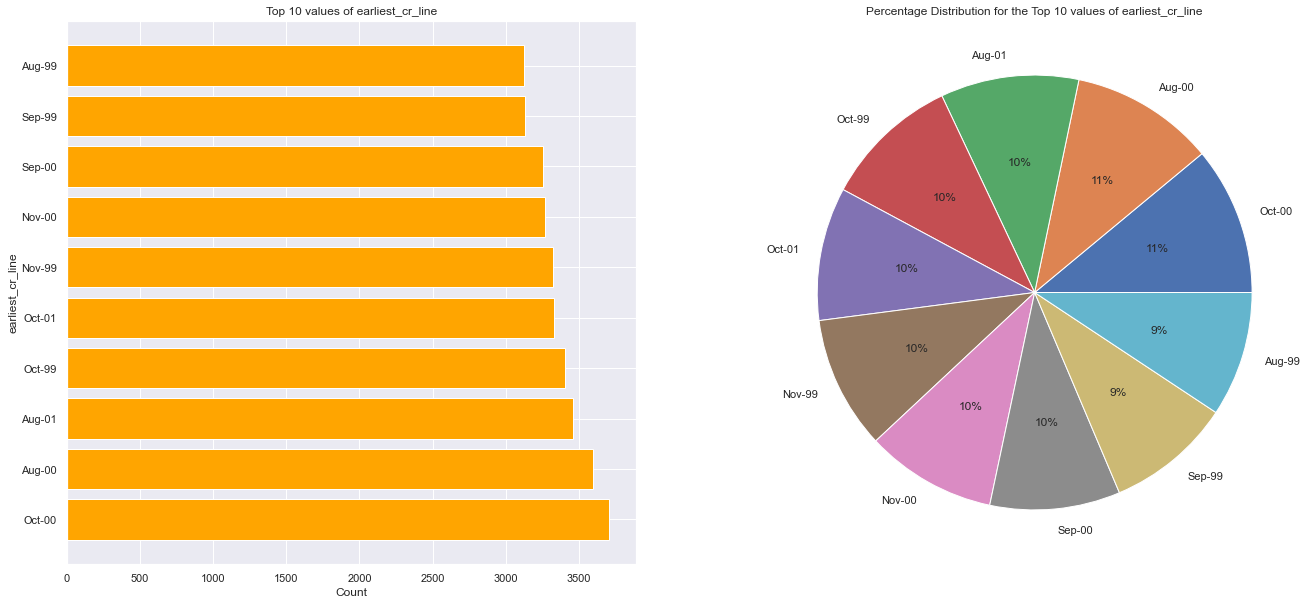

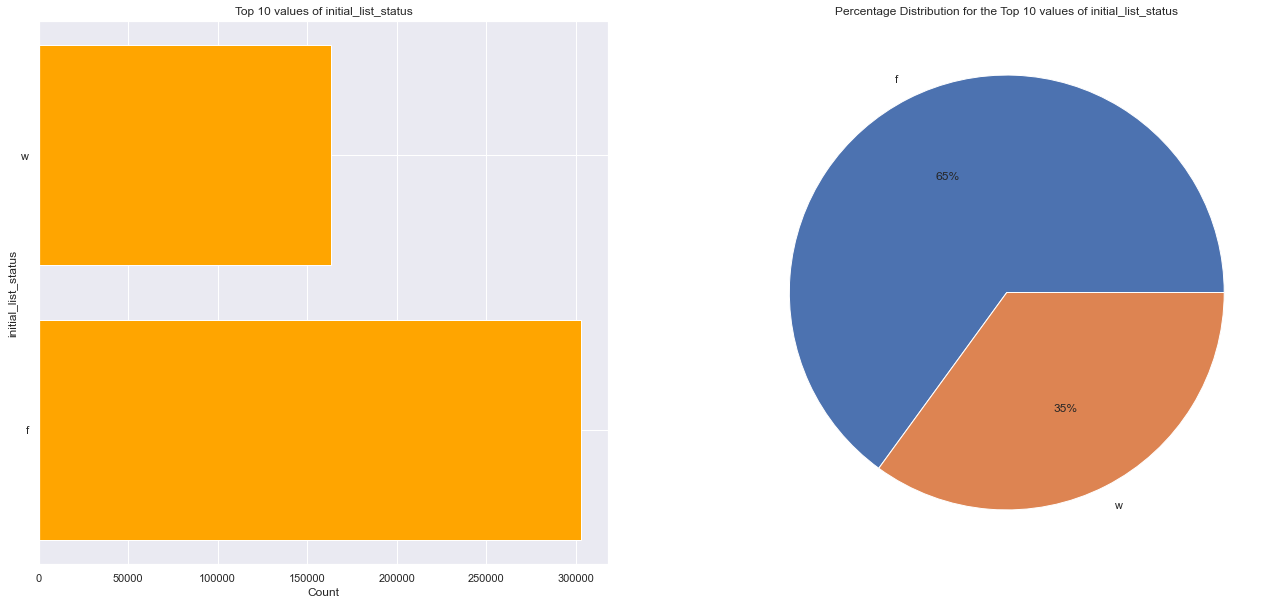

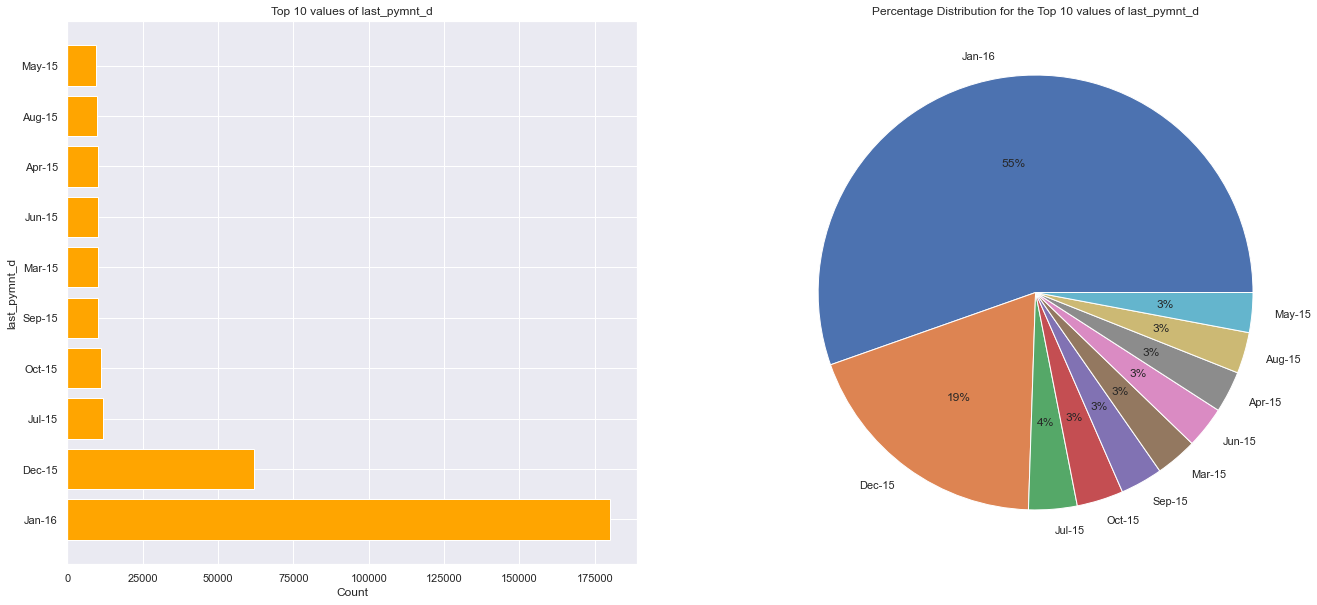

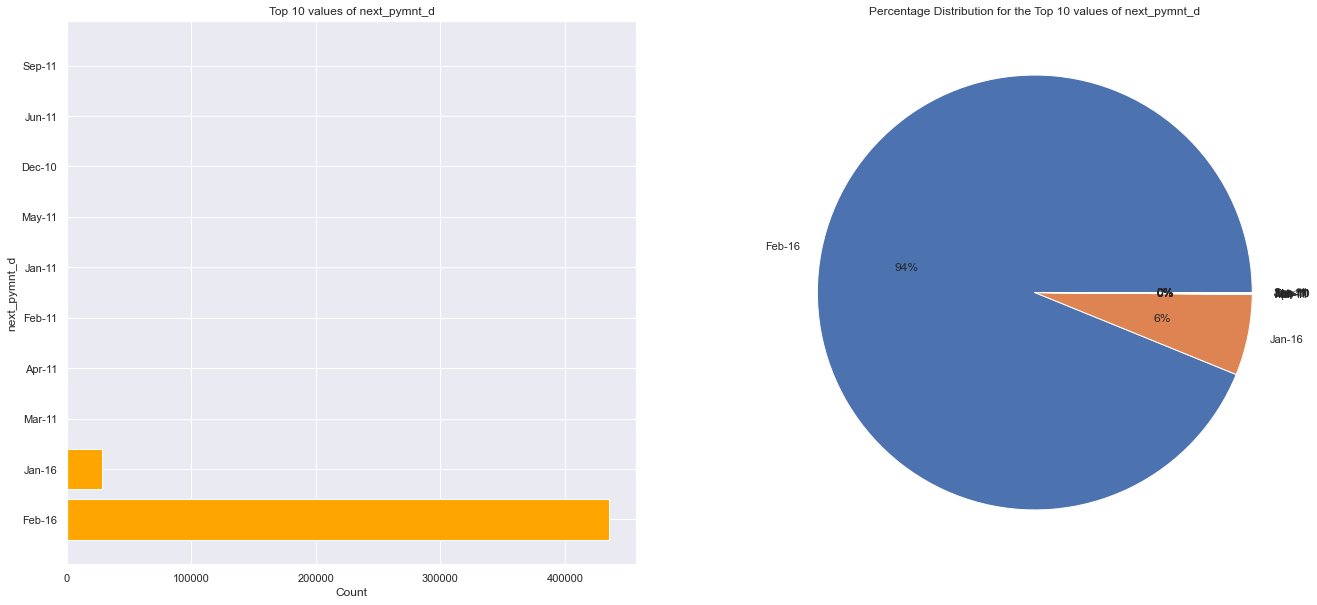

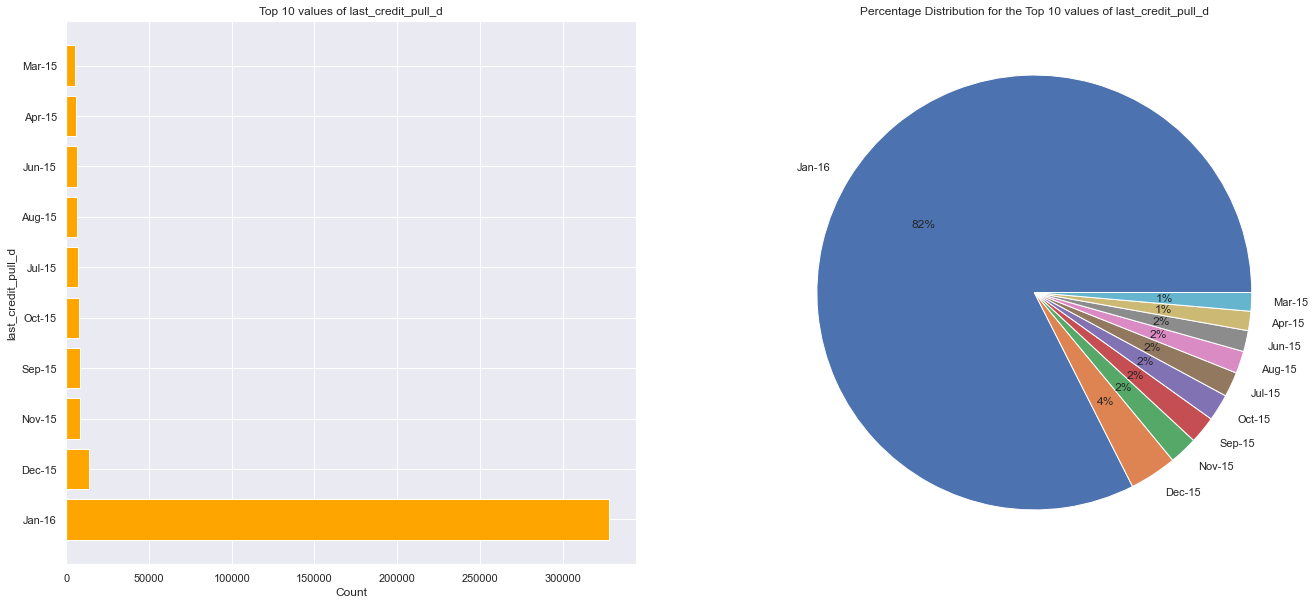

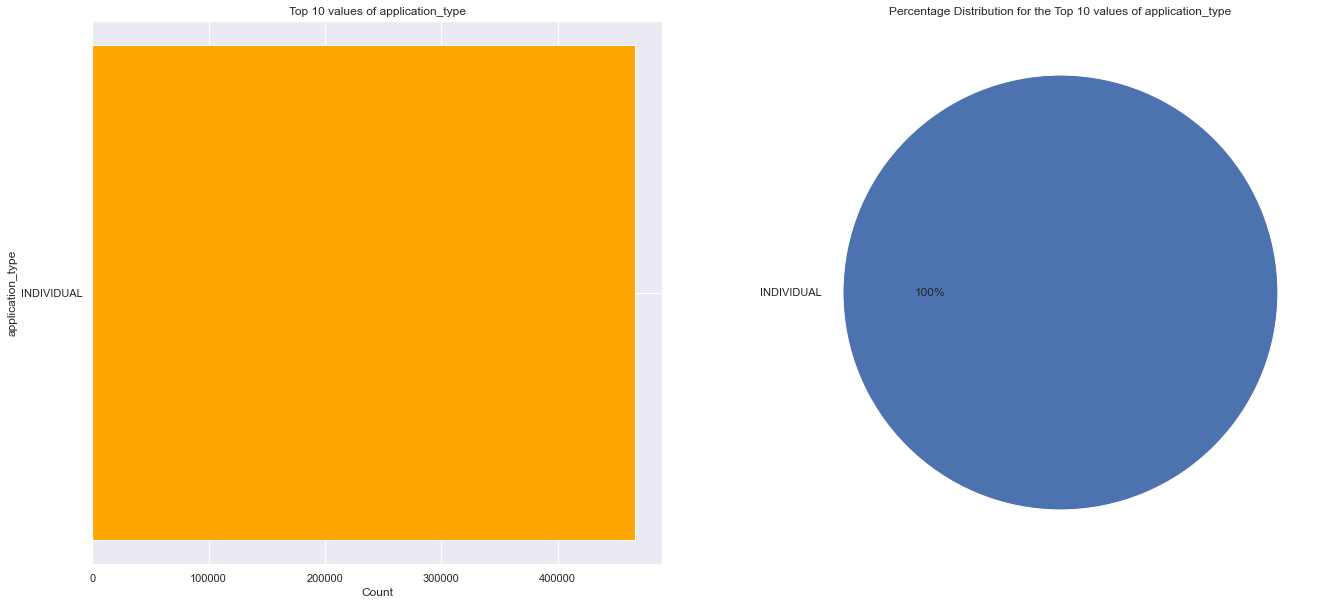

In [25]:
plot_categorical_data(data_cleaned)

In [26]:
categorical_columns_after_data_cleaning, numerical_columns_after_data_cleaning = separate_categorical_and_numerical(data_cleaned)

In [27]:
def get_observations(categorical_columns_after_data_cleaning, numerical_columns_after_data_cleaning,data_cleaned):
    numerical_observations , categorical_observations  = [],[]
    numerical_means = []
    numerical_stds = []
    numerical_skew_type = []
    numerical_ids , categorical_ids  = [],[]
    
    for i in numerical_columns_after_data_cleaning:
        if np.mean(data_cleaned[i])>np.std(data_cleaned[i]):
            numerical_observations.append('The feature {0} has a right skewed distribution'.format(i))
            numerical_means.append(np.mean(data_cleaned[i]))
            numerical_stds.append(np.std(data_cleaned[i]))
            numerical_skew_type.append('Right Skewed')
            numerical_ids.append(i)
            
        elif np.mean(data_cleaned[i])<np.std(data_cleaned[i]):
            numerical_observations.append('The feature {0} has a left skewed distribution'.format(i))
            numerical_means.append(np.mean(data_cleaned[i]))
            numerical_stds.append(np.std(data_cleaned[i]))
            numerical_skew_type.append('Left Skewed')
            numerical_ids.append(i)
            
    for j in categorical_columns_after_data_cleaning:
        categorical_observations.append('The highest freq recorded is {0}'.format(data[j].mode()[0]))
        categorical_ids.append(j)
    
    df1 = pd.DataFrame({'Feature Name':numerical_ids,
                       'Observations': numerical_observations,
                       'Skewness':numerical_skew_type,
                       'Reported Std':numerical_stds,
                       'Reported Mean':numerical_means})
    
    df2 = pd.DataFrame({'Feature Name':categorical_ids,
                       'Observations':categorical_observations})
    
    return df1,df2

In [28]:
numerical_obs, categorical_obs = get_observations(categorical_columns_after_data_cleaning, numerical_columns_after_data_cleaning,data_cleaned)

In [29]:
numerical_obs

Feature Name  \
0                            id   
1                     member_id   
2                     loan_amnt   
3                   funded_amnt   
4               funded_amnt_inv   
5                      int_rate   
6                   installment   
7                    annual_inc   
8                           dti   
9                   delinq_2yrs   
10               inq_last_6mths   
11       mths_since_last_delinq   
12       mths_since_last_record   
13                     open_acc   
14                      pub_rec   
15                    revol_bal   
16                   revol_util   
17                    total_acc   
18                    out_prncp   
19                out_prncp_inv   
20                  total_pymnt   
21              total_pymnt_inv   
22              total_rec_prncp   
23                total_rec_int   
24           total_rec_late_fee   
25                   recoveries   
26      collection_recovery_fee   
27              last_pymnt_amnt   
28   collections_12_mths_ex_med   
29  mths_since_last_major_derog   
30                  policy_code   
31               acc_now_delinq   
32                 tot_coll_amt   
33                  tot_cur_bal   
34             total_rev_hi_lim   

                                         Observations      Skewness  \
0      The feature id has a right skewed distribution  Right Skewed   
1   The feature member_id has a right skewed distr...  Right Skewed   
2   The feature loan_amnt has a right skewed distr...  Right Skewed   
3   The feature funded_amnt has a right skewed dis...  Right Skewed   
4   The feature funded_amnt_inv has a right skewed...  Right Skewed   
5   The feature int_rate has a right skewed distri...  Right Skewed   
6   The feature installment has a right skewed dis...  Right Skewed   
7   The feature annual_inc has a right skewed dist...  Right Skewed   
8     The feature dti has a right skewed distribution  Right Skewed   
9   The feature delinq_2yrs has a left skewed dist...   Left Skewed   
10  The feature inq_last_6mths has a left skewed d...   Left Skewed   
11  The feature mths_since_last_delinq has a right...  Right Skewed   
12  The feature mths_since_last_record has a right...  Right Skewed   
13  The feature open_acc has a right skewed distri...  Right Skewed   
14  The feature pub_rec has a left skewed distribu...   Left Skewed   
15  The feature revol_bal has a left skewed distri...   Left Skewed   
16  The feature revol_util has a right skewed dist...  Right Skewed   
17  The feature total_acc has a right skewed distr...  Right Skewed   
18  The feature out_prncp has a left skewed distri...   Left Skewed   
19  The feature out_prncp_inv has a left skewed di...   Left Skewed   
20  The feature total_pymnt has a right skewed dis...  Right Skewed   
21  The feature total_pymnt_inv has a right skewed...  Right Skewed   
22  The feature total_rec_prncp has a right skewed...  Right Skewed   
23  The feature total_rec_int has a right skewed d...  Right Skewed   
24  The feature total_rec_late_fee has a left skew...   Left Skewed   
25  The feature recoveries has a left skewed distr...   Left Skewed   
26  The feature collection_recovery_fee has a left...   Left Skewed   
27  The feature last_pymnt_amnt has a left skewed ...   Left Skewed   
28  The feature collections_12_mths_ex_med has a l...   Left Skewed   
29  The feature mths_since_last_major_derog has a ...  Right Skewed   
30  The feature policy_code has a right skewed dis...  Right Skewed   
31  The feature acc_now_delinq has a left skewed d...   Left Skewed   
32  The feature tot_coll_amt has a left skewed dis...   Left Skewed   
33  The feature tot_cur_bal has a left skewed dist...   Left Skewed   
34  The feature total_rev_hi_lim has a left skewed...   Left Skewed   

    Reported Std  Reported Mean  
0   1.089370e+07   1.307973e+07  
1   1.168235e+07   1.459766e+07  
2   8.286500e+03   1.431728e+04  
3   8.274362e+03   1.429180e+04  
4   8.297629e+03   1.422233e+04

In [30]:
categorical_obs

Feature Name                                       Observations
0                  term            The highest freq recorded is  36 months
1                 grade                     The highest freq recorded is B
2             sub_grade                    The highest freq recorded is B3
3             emp_title               The highest freq recorded is Teacher
4            emp_length             The highest freq recorded is 10+ years
5        home_ownership              The highest freq recorded is MORTGAGE
6   verification_status              The highest freq recorded is Verified
7               issue_d                The highest freq recorded is Oct-14
8           loan_status               The highest freq recorded is Current
9            pymnt_plan                     The highest freq recorded is n
10                  url  The highest freq recorded is https://www.lendi...
11                 desc                     The highest freq recorded is  
12              purpose    The highest freq recorded is debt_consolidation
13                title    The highest freq recorded is Debt consolidation
14             zip_code                 The highest freq recorded is 945xx
15           addr_state                    The highest freq recorded is CA
16     earliest_cr_line                The highest freq recorded is Oct-00
17  initial_list_status                     The highest freq recorded is f
18         last_pymnt_d                The highest freq recorded is Jan-16
19         next_pymnt_d                The highest freq recorded is Feb-16
20   last_credit_pull_d                The highest freq recorded is Jan-16
21     application_type            The highest freq recorded is INDIVIDUAL